In [1]:
## Start by installing the necessary Google Cloud libraries in your Google Colab env
!pip install --upgrade --quiet gcsfs google-cloud-storage
!pip install plotly


In [2]:
## Authenticate your Google account to access Google Cloud services. This will allow you to interact with Google Cloud Storage using the credentials associated with your account.
## Also import your Google Drive to access your team's Shared Google Drive as well as Operating System
from google.colab import auth
from google.colab import drive
import os
auth.authenticate_user()
drive.mount('/content/drive', force_remount=True)

## If your team is using a Shared Drive in a Google Workspace (usually through a University Gmail account)
directory_path = '/content/drive/Shared drives/YOUR_SHARED_DRIVE_NAME/'

## if your team is using a Shared Folder in a non-Google Workspace (for a free, individual account)
directory_path = '/content/drive/Mydrive/HDSI/'


Mounted at /content/drive


In [3]:
## Initialize the Google Cloud Storage client.
from google.cloud import storage
##client = storage.Client(project='HDSI-AGRI-TEST-PROJECT')
client = storage.Client(project='HDSI-Agri-Datathon-2024')

In [4]:
## All the data you need will be located in a specific prompt folder located in a Google bucket.
## I have included some code for you all to start exploring file types

bucket_name = 'hdsi-agri-prompt-data'
## Access the specified bucket
bucket = client.bucket(bucket_name)

## List all blobs (files and folders) in the bucket
blobs = list(bucket.list_blobs())

## Initialize variables to count and store folder names and file types
folders = set()
file_types = set()
blob_count = 0

# ## Loop through all blobs to gather folder names and file types
# for blob in blobs:
#     blob_name = blob.name

#     ## Check if it's a folder (by convention, ends with '/')
#     if blob_name.endswith('/'):
#         folders.add(blob_name)
#     else:
#         ## Capture file type
#         file_extension = blob_name.split('.')[-1] if '.' in blob_name else 'Unknown'
#         file_types.add(file_extension)

#     blob_count += 1

# ## list the folders
# print("Folders in the bucket:")
# for folder in folders:
#     print(f" - {folder}")

# ## Show the file types of the first 5 files (skip folders)
# print("\nFirst 5 file types:")
# counter = 0
# for blob in blobs:
#     if not blob.name.endswith('/') and counter < 5:
#         file_name = blob.name
#         file_extension = file_name.split('.')[-1] if '.' in file_name else 'Unknown'
#         print(f"File name: {file_name}, File type: {file_extension}")
#         counter += 1

# ## Total count of blobs
# print(f"\nTotal number of blobs in the bucket: {blob_count}")

# ## Print the unique file types found
# print(f"\nFile types in the bucket: {', '.join(file_types)}")

Working on the getting all the information on the from cvs.

In [5]:
##all my imports
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots



In [112]:
file_path = '/content/drive/MyDrive/Colab Notebooks/land_use_farm_ops.csv'
land_use_farm_ops = pd.read_csv(file_path)
land_use_farm_ops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18775 entries, 0 to 18774
Data columns (total 75 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   STATE_FIPS_CODE                                                                                18775 non-null  int64  
 1   COUNTY_CODE                                                                                    18775 non-null  int64  
 2   YEAR                                                                                           18775 non-null  int64  
 3   AG_LAND_CROP_INSURANCE_ACRES                                                                   15111 non-null  object 
 4   AG_LAND_CROP_INSURANCE_NUMBER_OF_OPERATIONS                                                    15111 non-null  float64
 5   AG_LAND_CROPLAND_A

In [111]:
file_path = '/content/drive/MyDrive/Colab Notebooks/prompt3_wide_3.0.csv'
prompt_wide_three = pd.read_csv(file_path)
prompt_wide_three.columns

<ipython-input-111-728a05dfa1f4>:2: DtypeWarning:

Columns (3,20,24,26,50,51,54,86,87,90,102,103,106,108,118,126,127,130,131,133,135,137,139,149,161,162,165,166,167,176,177,180,181,182,183,186,187,191,205,207,209,211,216,217,220,229,230,233,269,273,277,279,281,282,284,286,287,289,291,292,294,296,297,299,301,302,316,318,320,321,326,328,330,331,333,335,336,338,340,349,350,353,354,356,367,377,399,400,403,404,406,410,412,414,416,418,419,422,425,426,431,433,439,440,443,446,447,450,451,453,455,457,459,460,462,463,465,467,468,470,472,473,475,477,478,480,482,483,488,490,491,494,503,505,507,509,511,513,515,517,525,529,531,533,534,536,538,539,541,543,544,545,548,549,550,553,557,562,564,566,591,597,598,601,607,611,613,623,624,633,640,641,644,648,652,653,656,673,675,677,683,685,687,689,703,705,706,709,714,715,724,730,731,734,735,736,739,760,767,769,770,780,787,788,790,799,800,802,803,805,813,839,840,843,844,846,848,850,851,865,872,875,876,886,927,928,931,933,942,943,946) have mixed types. Specify 

Index(['STATE_FIPS_CODE', 'COUNTY_CODE', 'YEAR',
       'AG_LAND_CROPLAND_HARVESTED_ACRES',
       'AG_LAND_CROPLAND_HARVESTED_IRRIGATED_ACRES',
       'AG_LAND_CROPLAND_HARVESTED_IRRIGATED_NUMBER_OF_OPERATIONS',
       'AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS',
       'ALMONDS_ACRES_TOTAL', 'ALMONDS_OPERATIONS_WITH_AREA_TOTAL',
       'APPLES_ACRES_TOTAL',
       ...
       'WHEAT_WINTER_ACRES_HARVESTED',
       'WHEAT_WINTER_IRRIGATED_ACRES_HARVESTED',
       'WHEAT_WINTER_IRRIGATED_OPERATIONS_WITH_AREA_HARVESTED',
       'WHEAT_WINTER_OPERATIONS_WITH_AREA_HARVESTED',
       'WHEAT_WINTER_PRODUCTION_MEASURED_IN_BU', 'WILD_RICE_ACRES_HARVESTED',
       'WILD_RICE_IRRIGATED_ACRES_HARVESTED',
       'WILD_RICE_IRRIGATED_OPERATIONS_WITH_AREA_HARVESTED',
       'WILD_RICE_OPERATIONS_WITH_AREA_HARVESTED',
       'WILD_RICE_PRODUCTION_MEASURED_IN_CWT'],
      dtype='object', length=947)

In [78]:
file_path = '/content/drive/MyDrive/Colab Notebooks/sales_data_county.csv'
sales_data_county = pd.read_csv(file_path)
sales_data_county.columns

<ipython-input-78-2317b71540cc>:2: DtypeWarning:

Columns (5,6,7,8,9,10,13,14,15,16,30,31,46,47,52,53,54,55,56,57,58,59,60,61,64,65,66,67,70,71,72,73,74,75,78,79,80,81,82,83,84,85,86,87,88,89,92,93,94,95) have mixed types. Specify dtype option on import or set low_memory=False.



Index(['STATE_FIPS_CODE', 'COUNTY_CODE', 'YEAR',
       'ANIMAL_TOTALS_INCL_PRODUCTS_OPERATIONS_WITH_SALES',
       'ANIMAL_TOTALS_INCL_PRODUCTS_SALES_MEASURED_IN_DOLLARS',
       'AQUACULTURE_TOTALS_OPERATIONS_WITH_SALES_DISTRIBUTION',
       'AQUACULTURE_TOTALS_SALES_DISTRIBUTION_MEASURED_IN_DOLLARS',
       'BARLEY_OPERATIONS_WITH_SALES', 'BARLEY_SALES_MEASURED_IN_DOLLARS',
       'BERRY_TOTALS_OPERATIONS_WITH_SALES',
       'BERRY_TOTALS_SALES_MEASURED_IN_DOLLARS',
       'CATTLE_INCL_CALVES_OPERATIONS_WITH_SALES',
       'CATTLE_INCL_CALVES_SALES_MEASURED_IN_DOLLARS',
       'COMMODITY_TOTALS_INCL_VALUE_ADDED_RETAIL_DIRECTLY_MARKETED_HUMAN_CONSUMPTION_OPERATIONS_WITH_SALES',
       'COMMODITY_TOTALS_INCL_VALUE_ADDED_RETAIL_DIRECTLY_MARKETED_HUMAN_CONSUMPTION_SALES_MEASURED_IN_DOLLARS',
       'COMMODITY_TOTALS_INCL_VALUE_ADDED_WHOLESALE_DIRECT_TO_RETAILERS_INSTITUTIONS_FOOD_HUBS_LOCAL_OR_REGIONALLY_BRANDED_PRODUCTS_HUMAN_CONSUMPTION_OPERATIONS_WITH_SALES',
       'COMMODITY_TOTALS

In [9]:
file_path = '/content/drive/MyDrive/Colab Notebooks/GDP_price_index_Table.xlsx'
gdp_price_index = pd.read_excel(file_path)
print(gdp_price_index.head())

  Table 1.1.4. Price Indexes for Gross Domestic Product Unnamed: 1 Unnamed: 2  \
0                          [Index numbers, 2017=100]           NaN        NaN   
1                        Bureau of Economic Analysis           NaN        NaN   
2  Last Revised on: August 29, 2024 - Next Releas...           NaN        NaN   
3                                                NaN           NaN        NaN   
4                                               Line           NaN       1990   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4       1991       1992       1993       1994       1995       1996   

  Unnamed: 9  ... Unnamed: 25 Unnamed: 26 Unnamed: 27 Unnamed: 28 Unnamed: 29  \
0    

In [10]:
# prompt: make commnet. This seciont all the local list and distioan defined

# This section defines all the local lists and dictionaries used in the code.
# It includes data structures for storing variables, results of functions, and intermediate calculations.
# It is important to have these definitions clearly documented for better readability and maintainability.

# # Define regions

regions = {
    'West': [
        'WA', 'OR', 'CA', 'NV', 'ID', 'MT',
        'WY', 'CO', 'UT', 'NM', 'AZ', 'AK', 'HI'
    ],
    'South': [
        'DE', 'MD', 'VA', 'WV', 'NC',
        'SC', 'GA', 'FL', 'KY', 'TN', 'AL',
        'MS', 'AR', 'LA', 'TX', 'OK', 'DC'
    ],
    'Midwest': [
        'OH', 'IN', 'IL', 'MI', 'WI', 'MN',
        'IA', 'MO', 'ND', 'SD', 'NE', 'KS'
    ]
}


#Version 1
# regions = {
#     'Midwest': ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI'],
#     'Southeast': ['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV',],
#     'Southwest': ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'OK', 'TX', 'WY'],
#     'Pacific Coast': ['CA', 'OR', 'WA']
# }

fips_to_state = {
    '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR', '06': 'CA', '08': 'CO', '09': 'CT', '10': 'DE', '11': 'DC',
    '12': 'FL', '13': 'GA', '15': 'HI', '16': 'ID', '17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS', '21': 'KY',
    '22': 'LA', '23': 'ME', '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS', '29': 'MO', '30': 'MT',
    '31': 'NE', '32': 'NV', '33': 'NH', '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC', '38': 'ND', '39': 'OH',
    '40': 'OK', '41': 'OR', '42': 'PA', '44': 'RI', '45': 'SC', '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT',
    '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV', '55': 'WI', '56': 'WY'
}

# Dictionary with FIPS code, State Abbreviation, Latitude, and Longitude
fips_to_state_coords = {
    '01': {'abbr': 'AL', 'lat': 32.806671, 'lon': -86.791130},  # Alabama
    '02': {'abbr': 'AK', 'lat': 61.370716, 'lon': -152.404419},  # Alaska
    '04': {'abbr': 'AZ', 'lat': 33.729759, 'lon': -111.431221},  # Arizona
    '05': {'abbr': 'AR', 'lat': 34.969704, 'lon': -92.373123},   # Arkansas
    '06': {'abbr': 'CA', 'lat': 36.116203, 'lon': -119.681564},  # California
    '08': {'abbr': 'CO', 'lat': 39.059811, 'lon': -105.311104},  # Colorado
    '09': {'abbr': 'CT', 'lat': 41.597782, 'lon': -72.755371},   # Connecticut
    '10': {'abbr': 'DE', 'lat': 39.318523, 'lon': -75.507141},   # Delaware
    '11': {'abbr': 'DC', 'lat': 38.897438, 'lon': -77.026817},   # District of Columbia
    '12': {'abbr': 'FL', 'lat': 27.766279, 'lon': -81.686783},   # Florida
    '13': {'abbr': 'GA', 'lat': 33.040619, 'lon': -83.643074},   # Georgia
    '15': {'abbr': 'HI', 'lat': 21.094318, 'lon': -157.498337},  # Hawaii
    '16': {'abbr': 'ID', 'lat': 44.240459, 'lon': -114.478828},  # Idaho
    '17': {'abbr': 'IL', 'lat': 40.349457, 'lon': -88.986137},   # Illinois
    '18': {'abbr': 'IN', 'lat': 39.849426, 'lon': -86.258278},   # Indiana
    '19': {'abbr': 'IA', 'lat': 42.011539, 'lon': -93.210526},   # Iowa
    '20': {'abbr': 'KS', 'lat': 38.526600, 'lon': -96.726486},   # Kansas
    '21': {'abbr': 'KY', 'lat': 37.668140, 'lon': -84.670067},   # Kentucky
    '22': {'abbr': 'LA', 'lat': 31.169546, 'lon': -91.867805},   # Louisiana
    '23': {'abbr': 'ME', 'lat': 44.693947, 'lon': -69.381927},   # Maine
    '24': {'abbr': 'MD', 'lat': 39.063946, 'lon': -76.802101},   # Maryland
    '25': {'abbr': 'MA', 'lat': 42.230171, 'lon': -71.530106},   # Massachusetts
    '26': {'abbr': 'MI', 'lat': 43.326618, 'lon': -84.536095},   # Michigan
    '27': {'abbr': 'MN', 'lat': 45.694454, 'lon': -93.900192},   # Minnesota
    '28': {'abbr': 'MS', 'lat': 32.741646, 'lon': -89.678696},   # Mississippi
    '29': {'abbr': 'MO', 'lat': 38.456085, 'lon': -92.288368},   # Missouri
    '30': {'abbr': 'MT', 'lat': 46.921925, 'lon': -110.454353},  # Montana
    '31': {'abbr': 'NE', 'lat': 41.125370, 'lon': -98.268082},   # Nebraska
    '32': {'abbr': 'NV', 'lat': 38.313515, 'lon': -117.055374},  # Nevada
    '33': {'abbr': 'NH', 'lat': 43.452492, 'lon': -71.563896},   # New Hampshire
    '34': {'abbr': 'NJ', 'lat': 40.298904, 'lon': -74.521011},   # New Jersey
    '35': {'abbr': 'NM', 'lat': 34.840515, 'lon': -106.248482},  # New Mexico
    '36': {'abbr': 'NY', 'lat': 42.165726, 'lon': -74.948051},   # New York
    '37': {'abbr': 'NC', 'lat': 35.630066, 'lon': -79.806419},   # North Carolina
    '38': {'abbr': 'ND', 'lat': 47.528912, 'lon': -99.784012},   # North Dakota
    '39': {'abbr': 'OH', 'lat': 40.388783, 'lon': -82.764915},   # Ohio
    '40': {'abbr': 'OK', 'lat': 35.565342, 'lon': -96.928917},   # Oklahoma
    '41': {'abbr': 'OR', 'lat': 44.572021, 'lon': -122.070938},  # Oregon
    '42': {'abbr': 'PA', 'lat': 40.590752, 'lon': -77.209755},   # Pennsylvania
    '44': {'abbr': 'RI', 'lat': 41.680893, 'lon': -71.511780},   # Rhode Island
    '45': {'abbr': 'SC', 'lat': 33.856892, 'lon': -80.945007},   # South Carolina
    '46': {'abbr': 'SD', 'lat': 44.299782, 'lon': -99.438828},   # South Dakota
    '47': {'abbr': 'TN', 'lat': 35.747845, 'lon': -86.692345},   # Tennessee
    '48': {'abbr': 'TX', 'lat': 31.054487, 'lon': -97.563461},   # Texas
    '49': {'abbr': 'UT', 'lat': 40.150032, 'lon': -111.862434},  # Utah
    '50': {'abbr': 'VT', 'lat': 44.045876, 'lon': -72.710686},   # Vermont
    '51': {'abbr': 'VA', 'lat': 37.769337, 'lon': -78.169968},   # Virginia
    '53': {'abbr': 'WA', 'lat': 47.400902, 'lon': -121.490494},  # Washington
    '54': {'abbr': 'WV', 'lat': 38.491226, 'lon': -80.954456},   # West Virginia
    '55': {'abbr': 'WI', 'lat': 44.268543, 'lon': -89.616508},   # Wisconsin
    '56': {'abbr': 'WY', 'lat': 42.755966, 'lon': -107.302490},  # Wyoming
}


crop_columns = [
  "ALMONDS_ACRES_TOTAL", "APPLES_ACRES_TOTAL", "APRICOTS_ACRES_TOTAL", "AQUATIC_PLANTS_IN_THE_OPEN_ACRES_IN_PRODUCTION", "ARONIA_BERRIES_ACRES_GROWN", "ARTICHOKES_ACRES_HARVESTED", "ASPARAGUS_ACRES_HARVESTED", "AVOCADOS_ACRES_TOTAL", "BANANAS_ACRES_TOTAL", "BARLEY_ACRES_HARVESTED", "BEANS_DRY_EDIBLE_EXCL_CHICKPEAS_LIMA_ACRES_HARVESTED", "BEDDING_PLANT_TOTALS_IN_THE_OPEN_ACRES_IN_PRODUCTION", "BEETS_ACRES_HARVESTED", "BERRIES_OTHER_ACRES_GROWN", "BERRY_TOTALS_ACRES_GROWN", "BLACKBERRIES_INCL_DEWBERRIES_MARIONBERRIES_ACRES_GROWN", "BLUEBERRIES_ACRES_GROWN", "BOYSENBERRIES_ACRES_GROWN", "BROCCOLI_ACRES_HARVESTED", "BRUSSELS_SPROUTS_ACRES_HARVESTED", "BUCKWHEAT_ACRES_HARVESTED", "BULBS_CORMS_RHIZOMES_TUBERS_DRY_IN_THE_OPEN_ACRES_IN_PRODUCTION", "CABBAGE_CHINESE_ACRES_HARVESTED", "CAMELINA_ACRES_HARVESTED", "CANOLA_ACRES_HARVESTED", "CARROTS_ACRES_HARVESTED", "CAULIFLOWER_ACRES_HARVESTED", "CELERY_ACRES_HARVESTED", "CHERIMOYAS_ACRES_TOTAL", "CHERRIES_SWEET_ACRES_TOTAL", "CHESTNUTS_ACRES_TOTAL", "CHICKPEAS_ACRES_HARVESTED", "CHICORY_ACRES_HARVESTED", "CITRUS_OTHER_ACRES_TOTAL", "COFFEE_ACRES_TOTAL", "CORN_GRAIN_ACRES_HARVESTED", "COTTON_ACRES_HARVESTED", "CRANBERRIES_ACRES_GROWN", "CUCUMBERS_ACRES_HARVESTED", "CURRANTS_ACRES_GROWN", "CUT_CHRISTMAS_TREES_ACRES_IN_PRODUCTION", "DAIKON_ACRES_HARVESTED", "DATES_ACRES_TOTAL", "DILL_IRRIGATED_OIL_ACRES_HARVESTED", "EGGPLANT_ACRES_HARVESTED", "ELDERBERRIES_ACRES_GROWN", "EMMER_SPELT_ACRES_HARVESTED", "ESCAROLE_ENDIVE_ACRES_HARVESTED", "FIELD_CROPS_OTHER_ACRES_HARVESTED", "FIGS_ACRES_TOTAL", "FLAXSEED_ACRES_HARVESTED", "FLORICULTURE_OTHER_IN_THE_OPEN_ACRES_IN_PRODUCTION", "FLOWER_SEEDS_IN_THE_OPEN_ACRES_IN_PRODUCTION", "FLOWERING_PLANTS_POTTED_INDOOR_USE_IN_THE_OPEN_ACRES_IN_PRODUCTION", "FOLIAGE_PLANTS_INDOOR_USE_IN_THE_OPEN_ACRES_IN_PRODUCTION", "FRUIT_TOTALS_UNDER_PROTECTION_OPERATIONS_WITH_AREA_IN_PRODUCTION", "GARLIC_ACRES_HARVESTED", "GINGER_ROOT_ACRES_HARVESTED", "GINSENG_ACRES_HARVESTED", "GOOSEBERRIES_ACRES_GROWN", "GOURDS_ACRES_HARVESTED", "GRAPEFRUIT_ACRES_TOTAL", "GRAPES_ACRES_TOTAL", "GRASSES_BAHIA_GRASS_IRRIGATED_SEED_ACRES_HARVESTED", "GREENS_COLLARD_ACRES_HARVESTED", "GUAR_ACRES_HARVESTED", "GUAVAS_ACRES_TOTAL", "HAY_ACRES_HARVESTED", "HAYLAGE_ACRES_HARVESTED", "HAZELNUTS_ACRES_TOTAL", "HEMP_INDUSTRIAL_GRAIN_IN_THE_OPEN_ACRES_HARVESTED", "HERBS_DRY_ACRES_HARVESTED", "HOPS_ACRES_HARVESTED", "HORSERADISH_ACRES_HARVESTED", "JOJOBA_ACRES_HARVESTED", "KIWIFRUIT_ACRES_TOTAL", "KUMQUATS_ACRES_TOTAL", "LEGUMES_ALFALFA_IRRIGATED_SEED_ACRES_HARVESTED", "LEMONS_ACRES_TOTAL", "LENTILS_ACRES_HARVESTED", "LETTUCE_ACRES_HARVESTED", "LIMES_ACRES_TOTAL", "LOGANBERRIES_ACRES_GROWN", "LONGAN_ACRES_TOTAL", "LYCHEES_ACRES_TOTAL", "MACADAMIAS_ACRES_TOTAL", "MANGOES_ACRES_TOTAL", "MAPLE_SYRUP_NUMBER_OF_TAPS", "MELONS_CANTALOUP_ACRES_HARVESTED", "MILLET_PROSO_ACRES_HARVESTED", "MINT_IRRIGATED_OIL_ACRES_HARVESTED", "MISCANTHUS_ACRES_HARVESTED", "MULBERRIES_ACRES_GROWN", "MUSHROOM_SPAWN_OPERATIONS_WITH_SALES", "MUSHROOMS_OPERATIONS_WITH_AREA_IN_PRODUCTION", "MUSTARD_IRRIGATED_SEED_ACRES_HARVESTED", "NECTARINES_ACRES_TOTAL", "NON_CITRUS_OTHER_EXCL_BERRIES_ACRES_TOTAL", "NURSERY_TOTALS_IN_THE_OPEN_ACRES_IN_PRODUCTION", "OATS_ACRES_HARVESTED", "OKRA_ACRES_HARVESTED", "OLIVES_ACRES_TOTAL", "ONIONS_DRY_ACRES_HARVESTED", "ORANGES_ACRES_TOTAL", "ORCHARDS_ACRES_TOTAL", "PAPAYAS_ACRES_TOTAL", "PARSLEY_ACRES_HARVESTED", "PARSNIPS_ACRES_HARVESTED", "PASSION_FRUIT_ACRES_TOTAL", "PAWPAWS_ACRES_TOTAL", "PEACHES_ACRES_TOTAL", "PEANUTS_ACRES_HARVESTED", "PEARS_ACRES_TOTAL", "PEAS_AUSTRIAN_WINTER_ACRES_HARVESTED", "PECANS_ACRES_TOTAL", "PEPPERS_BELL_ACRES_HARVESTED", "PERSIMMONS_ACRES_TOTAL", "PINEAPPLES_ACRES_TOTAL", "PISTACHIOS_ACRES_TOTAL", "PLUM_APRICOT_HYBRIDS_INCL_PLUMCOTS_PLUOTS_ACRES_TOTAL", "PLUMS_ACRES_TOTAL", "POMEGRANATES_ACRES_TOTAL", "POPCORN_IRRIGATED_SHELLED_ACRES_HARVESTED", "POTATOES_ACRES_HARVESTED", "PROPAGATIVE_MATERIAL_IN_THE_OPEN_ACRES_IN_PRODUCTION", "PRUNES_ACRES_TOTAL", "PUMPKINS_ACRES_HARVESTED", "RADISHES_ACRES_HARVESTED", "RAMBUTAN_ACRES_TOTAL", "RAPESEED_ACRES_HARVESTED", "RASPBERRIES_ACRES_GROWN", "RHUBARB_ACRES_HARVESTED", "RICE_ACRES_HARVESTED", "RYE_ACRES_HARVESTED", "SAFFLOWER_ACRES_HARVESTED", "SESAME_ACRES_HARVESTED", "SHORT_TERM_WOODY_CROPS_ACRES_HARVESTED", "SOD_HARVESTED_OR_INTENDED_FOR_SALE_IN_FUTURE_YEARS_OPERATIONS_WITH_SALES", "SORGHUM_GRAIN_ACRES_HARVESTED", "SOYBEANS_ACRES_HARVESTED", "SPINACH_ACRES_HARVESTED", "SQUASH_ACRES_HARVESTED", "STRAWBERRIES_ACRES_GROWN", "SUGARBEETS_ACRES_HARVESTED", "SUGARCANE_IRRIGATED_SUGAR_SEED_ACRES_HARVESTED", "SUNFLOWER_ACRES_HARVESTED", "SWEET_CORN_ACRES_HARVESTED", "SWITCHGRASS_ACRES_HARVESTED", "TANGELOS_ACRES_TOTAL", "TANGERINES_ACRES_TOTAL", "TARO_ACRES_HARVESTED", "TOBACCO_ACRES_HARVESTED", "TOMATOES_IN_THE_OPEN_ACRES_HARVESTED",
  "TRANSPLANTS_COMMERCIAL_TOBACCO_IN_THE_OPEN_ACRES_IN_PRODUCTION",
  "TREE_NUT_TOTALS_ACRES_TOTAL",
  "TRITICALE_ACRES_HARVESTED",
  "TURNIPS_ACRES_HARVESTED",
  "VEGETABLE_SEEDS_OPERATIONS_WITH_AREA_IN_PRODUCTION",
  "VEGETABLES_OTHER_ACRES_HARVESTED",
  "WALNUTS_ENGLISH_ACRES_TOTAL",
  "WATERCRESS_ACRES_HARVESTED",
  "WHEAT_ACRES_HARVESTED",
  "WILD_RICE_ACRES_HARVESTED"
]



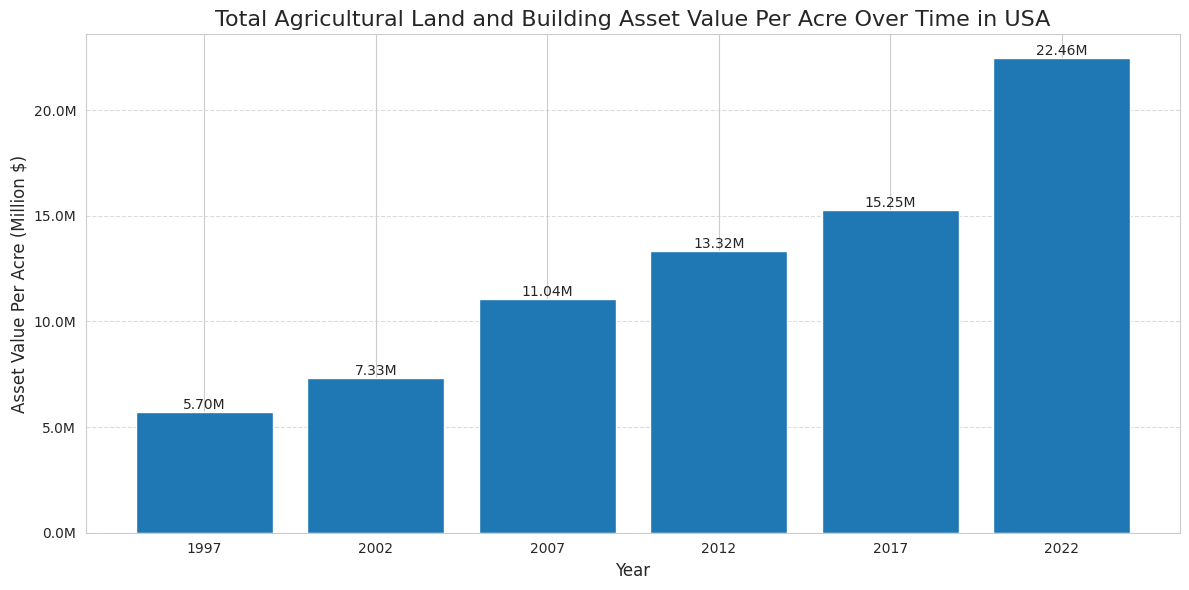

In [121]:
 ##Linear graph plotting the Total ASSET_VALUE_MEASURED_IN_DOLLARS_ACRE over time
# This Python module analyzes and visualizes agricultural land and building asset values over time using the 'land_use_farm_ops' dataset. Key features include:

# Data Preprocessing: Converts asset value data to a consistent numeric format, handling various data types and anomalies.
# Data Aggregation: Calculates yearly averages of agricultural land and building asset values.
# Visualization: Creates a line plot showing the trend of average asset values over time, with years on the x-axis and asset values (in billions of dollars) on the y-axis.
# Plot Customization: Includes clear labeling, formatted axis values, and data point markers for improved readability.
# Output: Displays a visual trend of agricultural asset values and prints a summary of yearly averages.

# This module is useful for tracking long-term trends in agricultural asset values, identifying market changes, and forming a basis for further economic analysis in the agricultural sector.


# # Print the first 10 values
# print("First 10 values in AG_LAND_INCL_BUILDINGS_ASSET_VALUE_MEASURED_IN_DOLLARS_ACRE column:")
# for index, value in land_use_farm_ops['AG_LAND_INCL_BUILDINGS_ASSET_VALUE_MEASURED_IN_DOLLARS_ACRE'].head(10).items():
#     print(f"Index: {index}, Value: {value}")

# # Print some summary statistics
# print("\nSummary statistics:")
# print(land_use_farm_ops['AG_LAND_INCL_BUILDINGS_ASSET_VALUE_MEASURED_IN_DOLLARS_ACRE'].describe())


# Function to safely convert values to float
def safe_float_convert(x):
    try:
        return float(x)
    except ValueError:
        if x == '(D)':
            return np.nan  # Replace '(D)' with NaN
        elif 'E' in x or 'e' in x:
            return float(x)  # Handle scientific notation
        else:
            return np.nan  # Replace any other non-convertible values with NaN

# Convert AG_LAND_INCL_BUILDINGS_ASSET_VALUE_MEASURED_IN_DOLLARS_ACRE to numeric
land_use_farm_ops['AG_LAND_INCL_BUILDINGS_ASSET_VALUE_MEASURED_IN_DOLLARS_ACRE'] = land_use_farm_ops['AG_LAND_INCL_BUILDINGS_ASSET_VALUE_MEASURED_IN_DOLLARS_ACRE'].apply(safe_float_convert)

# Group by YEAR and calculate the sum asset value
yearly_avg = land_use_farm_ops.groupby('YEAR')['AG_LAND_INCL_BUILDINGS_ASSET_VALUE_MEASURED_IN_DOLLARS_ACRE'].sum().reset_index()

# Convert to millions
yearly_avg['Value_Millions'] = yearly_avg['AG_LAND_INCL_BUILDINGS_ASSET_VALUE_MEASURED_IN_DOLLARS_ACRE'] / 1e6

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(yearly_avg)), yearly_avg['Value_Millions'])

# Customize the plot
plt.title('Total Agricultural Land and Building Asset Value Per Acre Over Time in USA', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Asset Value Per Acre (Million $)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

# Format y-axis to use 'M' for millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}M'))

# Set x-axis ticks and labels
plt.xticks(range(len(yearly_avg)), yearly_avg['YEAR'], rotation=45 if len(yearly_avg) > 10 else 0)

# Add value labels on top of each bar and year labels in the middle
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}M',
             ha='center', va='bottom', rotation=0)



plt.tight_layout()
plt.show()

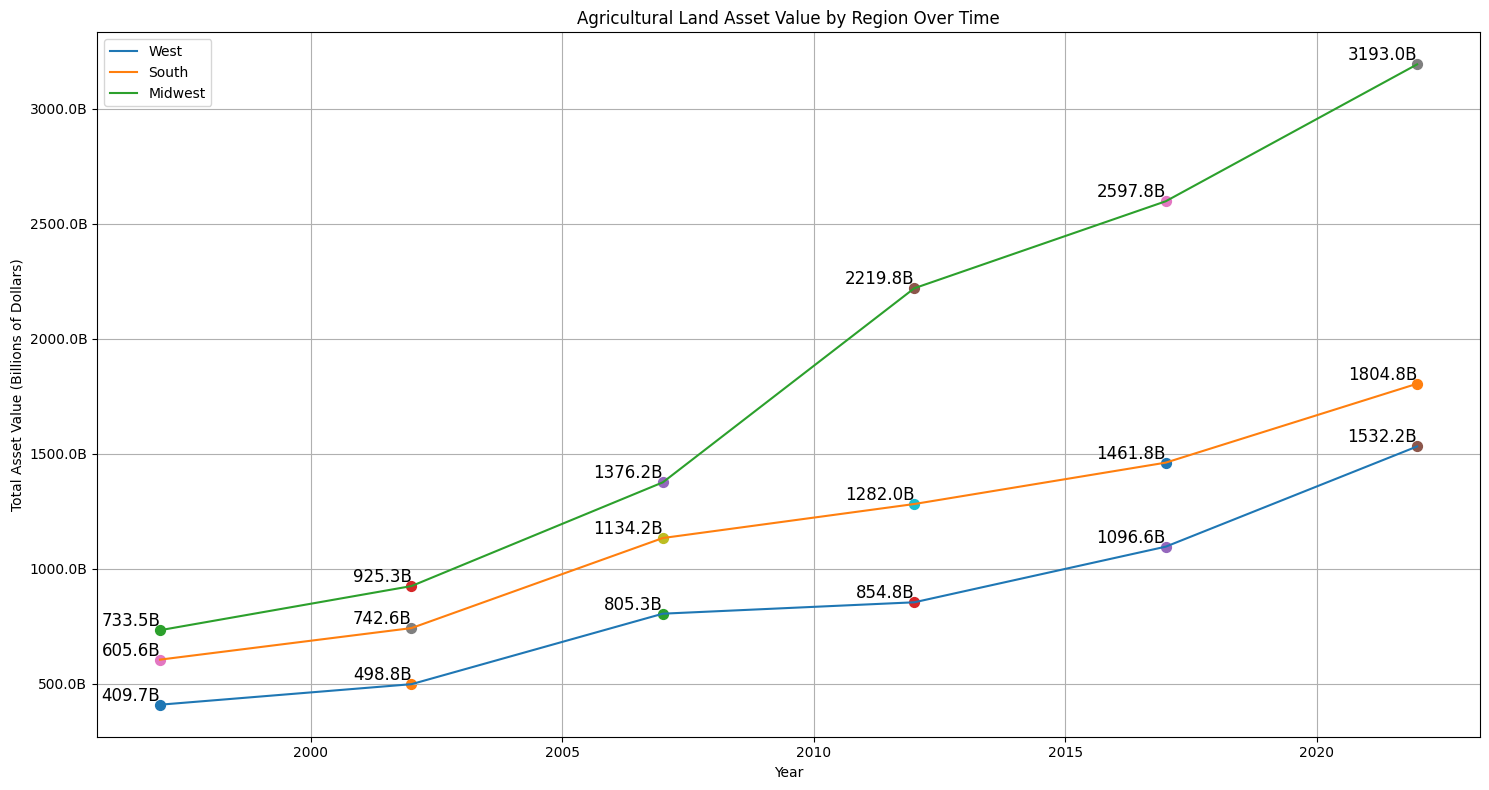

In [12]:
##Linear graph plotting the Total ASSET_VALUE_MEASURED_IN_DOLLARS_ACRE over time but aslo region.
# Clean STATE_FIPS_CODE
land_use_farm_ops['STATE_FIPS_CODE'] = land_use_farm_ops['STATE_FIPS_CODE'].replace('(D)', np.nan)
land_use_farm_ops['STATE_FIPS_CODE'] = pd.to_numeric(land_use_farm_ops['STATE_FIPS_CODE'], errors='coerce')

# Filter out FIPS codes above 56
land_use_farm_ops['STATE_FIPS_CODE'] = land_use_farm_ops['STATE_FIPS_CODE'].where(land_use_farm_ops['STATE_FIPS_CODE'] <= 56, np.nan)

# Format FIPS codes
land_use_farm_ops['STATE_FIPS_CODE'] = land_use_farm_ops['STATE_FIPS_CODE'].fillna(0).astype(int).astype(str).str.zfill(2)

# Convert FIPS to state abbreviations
land_use_farm_ops['STATE_ABBR'] = land_use_farm_ops['STATE_FIPS_CODE'].map(fips_to_state)

# Replace '00' with NaN for both columns
land_use_farm_ops.loc[land_use_farm_ops['STATE_FIPS_CODE'] == '00', ['STATE_FIPS_CODE', 'STATE_ABBR']] = np.nan

# Display the first few rows to verify the changes
#print(land_use_farm_ops[['STATE_FIPS_CODE', 'STATE_ABBR']].head())


def process_region(region_name, states):
    region_data = land_use_farm_ops[land_use_farm_ops['STATE_ABBR'].isin(states)]
    return region_data.groupby('YEAR')['AG_LAND_INCL_BUILDINGS_ASSET_VALUE_MEASURED_IN_DOLLARS'].sum().reset_index()

def format_billions(x, pos):
    return f'{x/1e9:.1f}B'

# Process data for each region
region_data = {region: process_region(region, states) for region, states in regions.items()}

# Create the plot
plt.figure(figsize=(15, 8))
##plt.rcParams['font.size'] = 16  # or any other size you prefer

for region, data in region_data.items():
    plt.plot(data['YEAR'], data['AG_LAND_INCL_BUILDINGS_ASSET_VALUE_MEASURED_IN_DOLLARS'], label=region)

    # Add 6 dots with values
    num_points = len(data)
    indices = [0, num_points//5, 2*num_points//5, 3*num_points//5, 4*num_points//5, -1]
    for idx in indices:
        x = data['YEAR'].iloc[idx]
        y = data['AG_LAND_INCL_BUILDINGS_ASSET_VALUE_MEASURED_IN_DOLLARS'].iloc[idx]
        plt.scatter(x, y, s=50)
        plt.text(x, y, format_billions(y, None), fontsize=12, ha='right', va='bottom')

plt.title('Agricultural Land Asset Value by Region Over Time')
plt.xlabel('Year')
plt.ylabel('Total Asset Value (Billions of Dollars)')
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_billions))
plt.tight_layout()
plt.show()



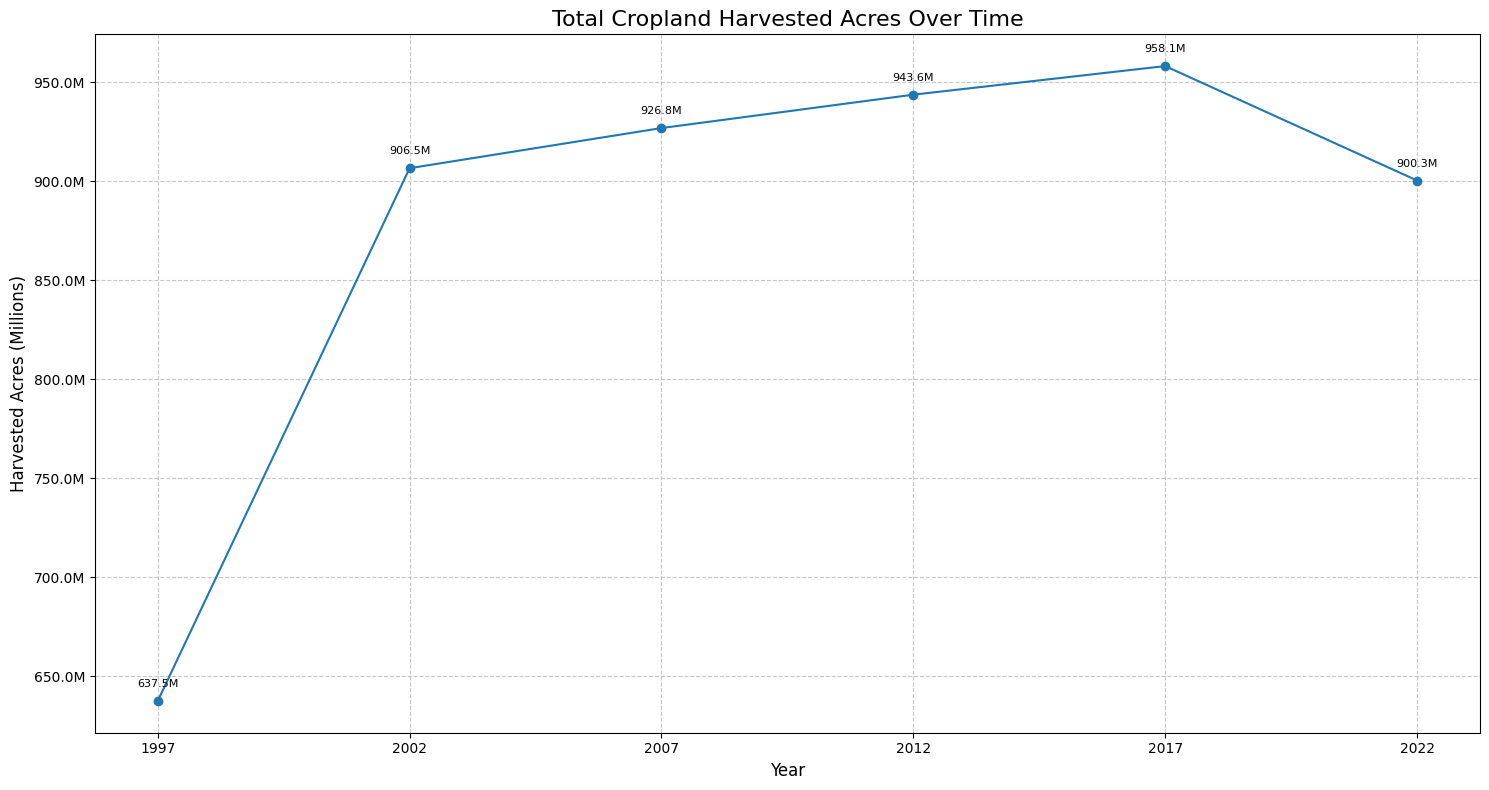

In [13]:
# This code will create a graph showing the total cropland harvested acres over time.

# Here's a plan to dive deeper into Cropland Utilization:
# First, let's create a basic graph of AG_LAND_CROPLAND_HARVESTED_ACRES vs. YEAR.
# Then, we'll enhance our analysis by:
# a) Comparing harvested acres to total cropland acres
# b) Calculating the percentage of cropland harvested
# c) Investigating any regional differences

# Function to safely convert values to float
def safe_float_convert(x):
    try:
        return float(x)
    except ValueError:
        if x == '(D)':
            return np.nan  # Replace '(D)' with NaN
        elif 'E' in x or 'e' in x:
            return float(x)  # Handle scientific notation
        else:
            return np.nan  # Replace any other non-convertible values with NaN

# Convert AG_LAND_CROPLAND_HARVESTED_ACRES to numeric
land_use_farm_ops['AG_LAND_CROPLAND_HARVESTED_ACRES'] = land_use_farm_ops['AG_LAND_CROPLAND_HARVESTED_ACRES'].apply(safe_float_convert)

# Group by YEAR and calculate the sum of harvested acres
yearly_sum = land_use_farm_ops.groupby('YEAR')['AG_LAND_CROPLAND_HARVESTED_ACRES'].sum().reset_index()

# Create the plot
plt.figure(figsize=(15, 8))  # Increased figure size for better readability
plt.plot(yearly_sum['YEAR'], yearly_sum['AG_LAND_CROPLAND_HARVESTED_ACRES'] / 1e6, marker='o')

# Customize the plot
plt.title('Total Cropland Harvested Acres Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Harvested Acres (Millions)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Format y-axis to use 'M' for millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}M'))

# Ensure all years are shown on x-axis
plt.xticks(yearly_sum['YEAR'], rotation=0)  # Rotate labels for better fit

# Add value labels on the points
for x, y in zip(yearly_sum['YEAR'], yearly_sum['AG_LAND_CROPLAND_HARVESTED_ACRES'] / 1e6):
    plt.annotate(f'{y:.1f}M', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.tight_layout()
plt.show()

# Print summary statistics


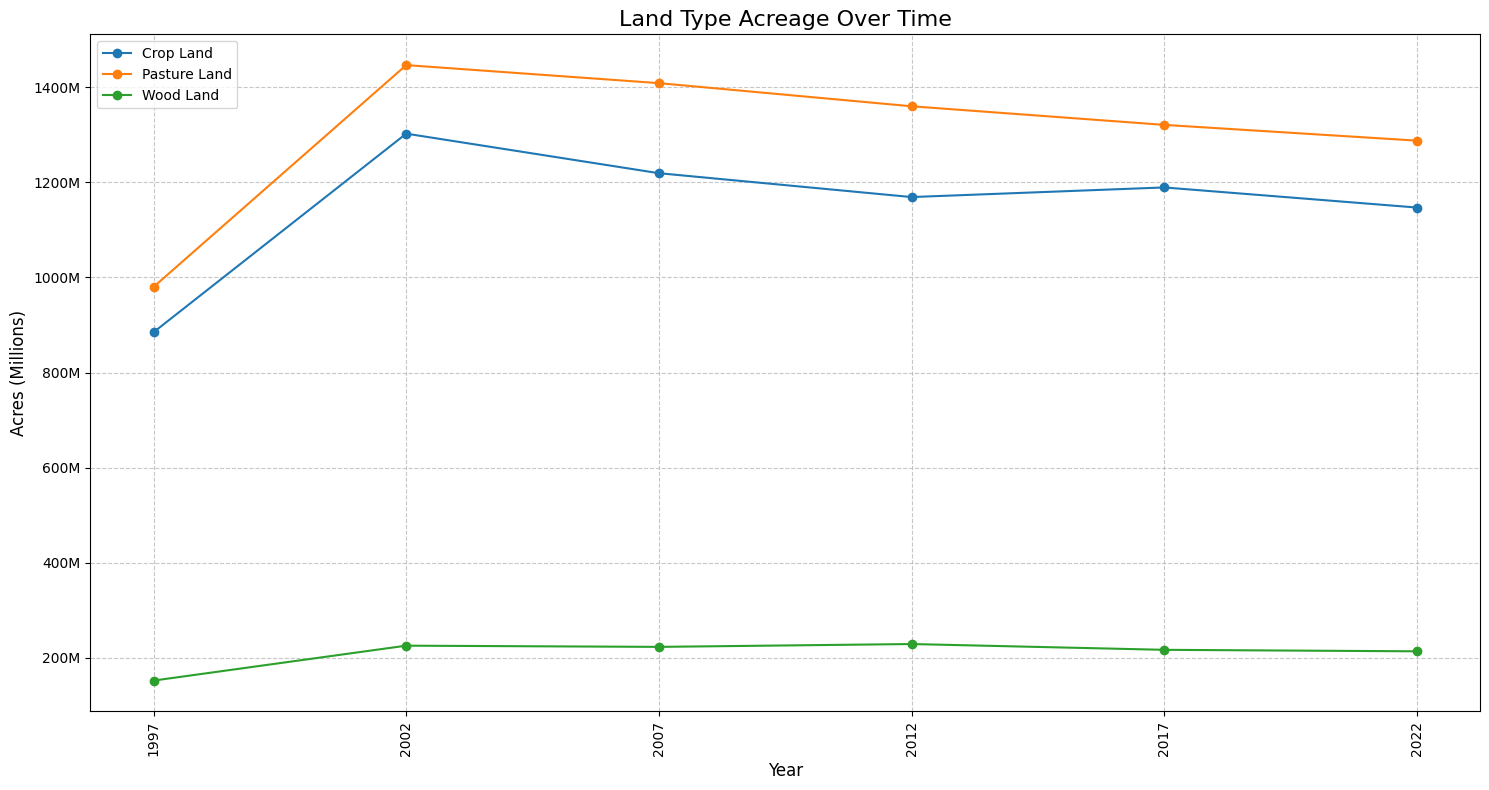

   YEAR  AG_LAND_CROPLAND_ACRES  AG_LAND_PASTURELAND_ACRES  \
0  1997            8.847443e+08               9.800037e+08   
1  2002            1.302426e+09               1.446609e+09   
2  2007            1.219242e+09               1.408672e+09   
3  2012            1.169047e+09               1.360023e+09   
4  2017            1.189296e+09               1.320887e+09   
5  2022            1.147017e+09               1.287738e+09   

   AG_LAND_WOODLAND_ACRES  
0             152002676.0  
1             225420950.0  
2             222883471.0  
3             228861441.0  
4             216674586.0  
5             213548128.0  


In [14]:
# To depict changes over time for AG_LAND_CROPLAND_ACRES, AG_LAND_PASTURELAND_ACRES, and AG_LAND_WOODLAND_ACRES using the YEAR column.


# Function to safely convert values to float
def safe_float_convert(x):
    try:
        return float(x)
    except ValueError:
        if x == '(D)':
            return np.nan  # Replace '(D)' with NaN
        elif 'E' in x or 'e' in x:
            return float(x)  # Handle scientific notation
        else:
            return np.nan  # Replace any other non-convertible values with NaN

# Columns we want to plot
columns_to_plot = ['AG_LAND_CROPLAND_ACRES', 'AG_LAND_PASTURELAND_ACRES', 'AG_LAND_WOODLAND_ACRES']
column_labels = ['Crop Land', 'Pasture Land', 'Wood Land']

# Convert columns to numeric
for col in columns_to_plot:
    land_use_farm_ops[col] = land_use_farm_ops[col].apply(safe_float_convert)

# Group by YEAR and sum the acres for each land type
yearly_sum = land_use_farm_ops.groupby('YEAR')[columns_to_plot].sum().reset_index()

# Create the line plot
plt.figure(figsize=(15, 8))

for col, label in zip(columns_to_plot, column_labels):
    plt.plot(yearly_sum['YEAR'], yearly_sum[col]/1e6, label=label, marker='o')

# Customize the plot
plt.title('Land Type Acreage Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Acres (Millions)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Format y-axis to use 'M' for millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}M'))

# Ensure all years are shown on x-axis
plt.xticks(yearly_sum['YEAR'], rotation=90)

# Add legend
plt.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

# Print summary statistics
# print(yearly_sum)




## make bar chart






#graph showing the distribution of AG_LAND_CROPLAND_ACRES, AG_LAND_PASTURELAND_ACRES, and AG_LAND_WOODLAND_ACRES over time.
##We'll handle the '(D)' values and use our safe float conversion function. Here's the code to create this graph:



#This visualization can help you understand how the usage of different types of agricultural
# land has evolved over time, which could provide insights into changing agricultural practices
# or land use policies.
# def safe_float_convert(x):
#     try:
#         return float(x)
#     except ValueError:
#         if x == '(D)':
#             return np.nan  # Replace '(D)' with NaN
#         elif 'E' in x or 'e' in x:
#             return float(x)  # Handle scientific notation
#         else:
#             return np.nan  # Replace any other non-convertible values with NaN

# # Columns we want to plot
# columns_to_plot = ['AG_LAND_CROPLAND_ACRES', 'AG_LAND_PASTURELAND_ACRES', 'AG_LAND_WOODLAND_ACRES']

# # Convert columns to numeric
# for col in columns_to_plot:
#     land_use_farm_ops[col] = land_use_farm_ops[col].apply(safe_float_convert)

# # Group by YEAR and sum the acres for each land type
# yearly_sum = land_use_farm_ops.groupby('YEAR')[columns_to_plot].sum().reset_index()

# # Create the stacked area plot
# plt.figure(figsize=(15, 8))

# plt.stackplot(yearly_sum['YEAR'],
#               [yearly_sum[col]/1e6 for col in columns_to_plot],
#               labels=columns_to_plot,
#               alpha=0.8)

# # Customize the plot
# plt.title('Distribution of Land Types Over Time', fontsize=16)
# plt.xlabel('Year', fontsize=12)
# plt.ylabel('Acres (Millions)', fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.7)

# # Format y-axis to use 'M' for millions
# plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}M'))

# # Ensure all years are shown on x-axis
# plt.xticks(yearly_sum['YEAR'], rotation=90)

# # Add legend
# plt.legend(loc='upper left', fontsize=10)

# plt.tight_layout()
# plt.show()

# # Print summary statistics
# print(yearly_sum)


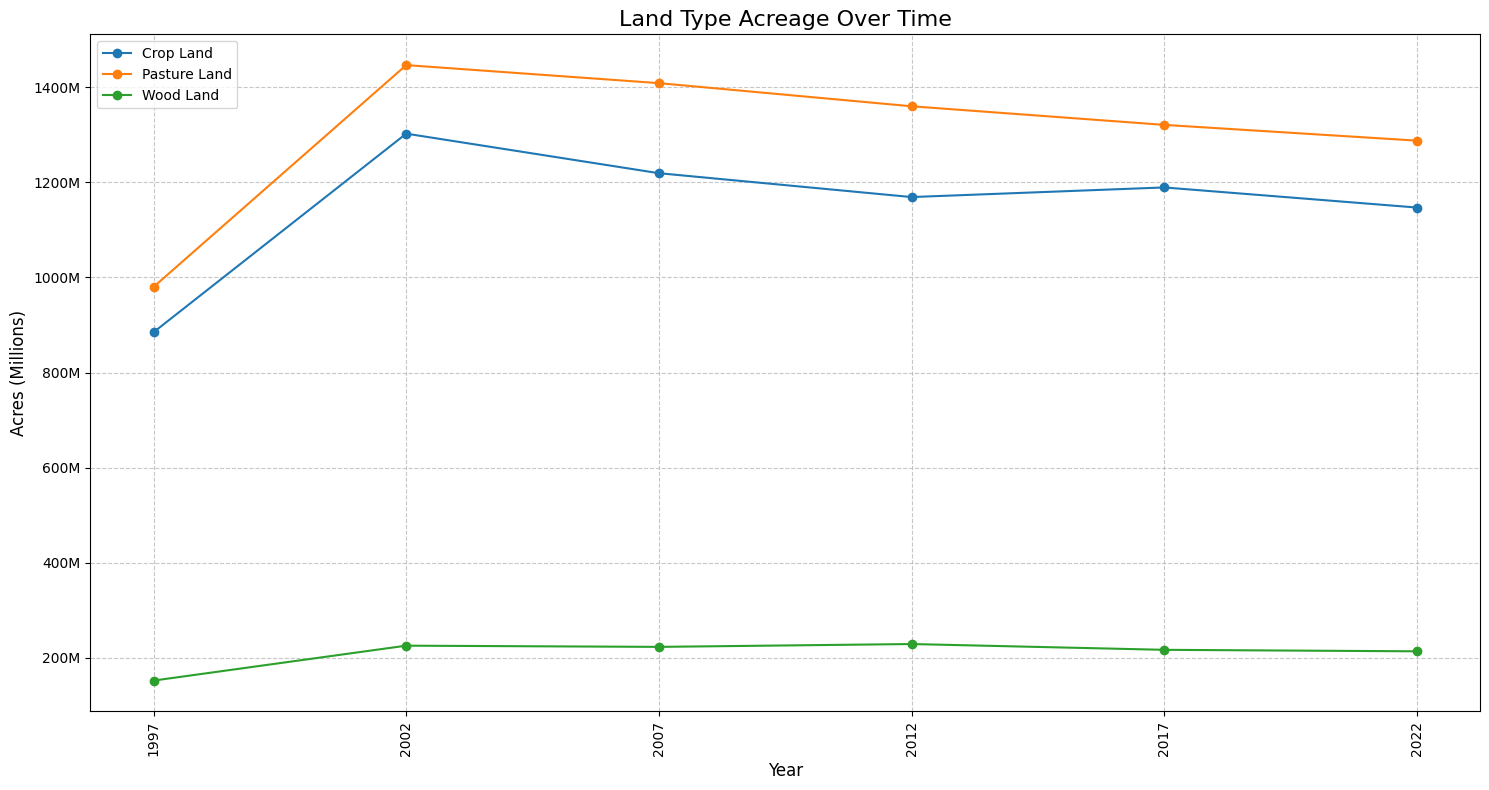

   YEAR  AG_LAND_CROPLAND_ACRES  AG_LAND_PASTURELAND_ACRES  \
0  1997            8.847443e+08               9.800037e+08   
1  2002            1.302426e+09               1.446609e+09   
2  2007            1.219242e+09               1.408672e+09   
3  2012            1.169047e+09               1.360023e+09   
4  2017            1.189296e+09               1.320887e+09   
5  2022            1.147017e+09               1.287738e+09   

   AG_LAND_WOODLAND_ACRES  
0             152002676.0  
1             225420950.0  
2             222883471.0  
3             228861441.0  
4             216674586.0  
5             213548128.0  


In [15]:
# To depict changes over time for AG_LAND_CROPLAND_ACRES, AG_LAND_PASTURELAND_ACRES, and AG_LAND_WOODLAND_ACRES using the YEAR column.


# Function to safely convert values to float
def safe_float_convert(x):
    try:
        return float(x)
    except ValueError:
        if x == '(D)':
            return np.nan  # Replace '(D)' with NaN
        elif 'E' in x or 'e' in x:
            return float(x)  # Handle scientific notation
        else:
            return np.nan  # Replace any other non-convertible values with NaN

# Columns we want to plot
columns_to_plot = ['AG_LAND_CROPLAND_ACRES', 'AG_LAND_PASTURELAND_ACRES', 'AG_LAND_WOODLAND_ACRES']
column_labels = ['Crop Land', 'Pasture Land', 'Wood Land']

# Convert columns to numeric
for col in columns_to_plot:
    land_use_farm_ops[col] = land_use_farm_ops[col].apply(safe_float_convert)

# Group by YEAR and sum the acres for each land type
yearly_sum = land_use_farm_ops.groupby('YEAR')[columns_to_plot].sum().reset_index()

# Create the line plot
plt.figure(figsize=(15, 8))

for col, label in zip(columns_to_plot, column_labels):
    plt.plot(yearly_sum['YEAR'], yearly_sum[col]/1e6, label=label, marker='o')

# Customize the plot
plt.title('Land Type Acreage Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Acres (Millions)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Format y-axis to use 'M' for millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}M'))

# Ensure all years are shown on x-axis
plt.xticks(yearly_sum['YEAR'], rotation=90)

# Add legend
plt.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

# Print summary statistics
print(yearly_sum)

## Change the graph I would more granurality and plot the top 3 states per year.



In [16]:
# Farm opration based on the sate size
# Convert STATE_FIPS_CODE to numeric if not already, and filter rows where it's <= 56
land_use_farm_ops['STATE_FIPS_CODE'] = pd.to_numeric(land_use_farm_ops['STATE_FIPS_CODE'], errors='coerce')

# Filter out rows where STATE_FIPS_CODE is greater than 56
land_use_farm_ops = land_use_farm_ops[land_use_farm_ops['STATE_FIPS_CODE'] <= 56]

# Create a dictionary to map FIPS codes to state abbreviations
fips_to_state = {
    '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR', '06': 'CA', '08': 'CO', '09': 'CT', '10': 'DE', '11': 'DC',
    '12': 'FL', '13': 'GA', '15': 'HI', '16': 'ID', '17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS', '21': 'KY',
    '22': 'LA', '23': 'ME', '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS', '29': 'MO', '30': 'MT',
    '31': 'NE', '32': 'NV', '33': 'NH', '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC', '38': 'ND', '39': 'OH',
    '40': 'OK', '41': 'OR', '42': 'PA', '44': 'RI', '45': 'SC', '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT',
    '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV', '55': 'WI', '56': 'WY'
}

# Convert the FIPS code to string and format as two digits
land_use_farm_ops['STATE_FIPS_CODE'] = land_use_farm_ops['STATE_FIPS_CODE'].apply(lambda x: f'{int(x):02d}')

# Map STATE_FIPS_CODE to corresponding state abbreviations
land_use_farm_ops['STATE_ABBR'] = land_use_farm_ops['STATE_FIPS_CODE'].map(fips_to_state)

## Create the choropleth map with a new color scale
fig = px.choropleth(
    land_use_farm_ops,
    locations='STATE_ABBR',
    locationmode='USA-states',
    color='FARM_OPERATIONS_NUMBER_OF_OPERATIONS',
    scope='usa',
    labels={'FRM_AOPERATIONS_NUMBER_OF_OPERATIONS': 'Number of Farm Operations'},
    color_continuous_scale='Viridis' ## reverse this color

    #color_continuous_scale='Blues'  # Updated color scale
)

# Add title and display the map
fig.update_layout(
    title_text='Farm Operations by State',
    geo=dict(scope='usa')
)

fig.show()

In [17]:
#makeing Bubble Map and size mathcing with circle.
# Convert STATE_FIPS_CODE to numeric if not already, and filter rows where it's <= 56
land_use_farm_ops['STATE_FIPS_CODE'] = pd.to_numeric(land_use_farm_ops['STATE_FIPS_CODE'], errors='coerce')

# Filter out rows where STATE_FIPS_CODE is greater than 56
land_use_farm_ops = land_use_farm_ops[land_use_farm_ops['STATE_FIPS_CODE'] <= 56]
# Dictionary with FIPS code, State Abbreviation, Latitude, and Longitude
fips_to_state_coords = {
    '01': {'abbr': 'AL', 'lat': 32.806671, 'lon': -86.791130},  # Alabama
    '02': {'abbr': 'AK', 'lat': 61.370716, 'lon': -152.404419},  # Alaska
    '04': {'abbr': 'AZ', 'lat': 33.729759, 'lon': -111.431221},  # Arizona
    '05': {'abbr': 'AR', 'lat': 34.969704, 'lon': -92.373123},   # Arkansas
    '06': {'abbr': 'CA', 'lat': 36.116203, 'lon': -119.681564},  # California
    '08': {'abbr': 'CO', 'lat': 39.059811, 'lon': -105.311104},  # Colorado
    '09': {'abbr': 'CT', 'lat': 41.597782, 'lon': -72.755371},   # Connecticut
    '10': {'abbr': 'DE', 'lat': 39.318523, 'lon': -75.507141},   # Delaware
    '11': {'abbr': 'DC', 'lat': 38.897438, 'lon': -77.026817},   # District of Columbia
    '12': {'abbr': 'FL', 'lat': 27.766279, 'lon': -81.686783},   # Florida
    '13': {'abbr': 'GA', 'lat': 33.040619, 'lon': -83.643074},   # Georgia
    '15': {'abbr': 'HI', 'lat': 21.094318, 'lon': -157.498337},  # Hawaii
    '16': {'abbr': 'ID', 'lat': 44.240459, 'lon': -114.478828},  # Idaho
    '17': {'abbr': 'IL', 'lat': 40.349457, 'lon': -88.986137},   # Illinois
    '18': {'abbr': 'IN', 'lat': 39.849426, 'lon': -86.258278},   # Indiana
    '19': {'abbr': 'IA', 'lat': 42.011539, 'lon': -93.210526},   # Iowa
    '20': {'abbr': 'KS', 'lat': 38.526600, 'lon': -96.726486},   # Kansas
    '21': {'abbr': 'KY', 'lat': 37.668140, 'lon': -84.670067},   # Kentucky
    '22': {'abbr': 'LA', 'lat': 31.169546, 'lon': -91.867805},   # Louisiana
    '23': {'abbr': 'ME', 'lat': 44.693947, 'lon': -69.381927},   # Maine
    '24': {'abbr': 'MD', 'lat': 39.063946, 'lon': -76.802101},   # Maryland
    '25': {'abbr': 'MA', 'lat': 42.230171, 'lon': -71.530106},   # Massachusetts
    '26': {'abbr': 'MI', 'lat': 43.326618, 'lon': -84.536095},   # Michigan
    '27': {'abbr': 'MN', 'lat': 45.694454, 'lon': -93.900192},   # Minnesota
    '28': {'abbr': 'MS', 'lat': 32.741646, 'lon': -89.678696},   # Mississippi
    '29': {'abbr': 'MO', 'lat': 38.456085, 'lon': -92.288368},   # Missouri
    '30': {'abbr': 'MT', 'lat': 46.921925, 'lon': -110.454353},  # Montana
    '31': {'abbr': 'NE', 'lat': 41.125370, 'lon': -98.268082},   # Nebraska
    '32': {'abbr': 'NV', 'lat': 38.313515, 'lon': -117.055374},  # Nevada
    '33': {'abbr': 'NH', 'lat': 43.452492, 'lon': -71.563896},   # New Hampshire
    '34': {'abbr': 'NJ', 'lat': 40.298904, 'lon': -74.521011},   # New Jersey
    '35': {'abbr': 'NM', 'lat': 34.840515, 'lon': -106.248482},  # New Mexico
    '36': {'abbr': 'NY', 'lat': 42.165726, 'lon': -74.948051},   # New York
    '37': {'abbr': 'NC', 'lat': 35.630066, 'lon': -79.806419},   # North Carolina
    '38': {'abbr': 'ND', 'lat': 47.528912, 'lon': -99.784012},   # North Dakota
    '39': {'abbr': 'OH', 'lat': 40.388783, 'lon': -82.764915},   # Ohio
    '40': {'abbr': 'OK', 'lat': 35.565342, 'lon': -96.928917},   # Oklahoma
    '41': {'abbr': 'OR', 'lat': 44.572021, 'lon': -122.070938},  # Oregon
    '42': {'abbr': 'PA', 'lat': 40.590752, 'lon': -77.209755},   # Pennsylvania
    '44': {'abbr': 'RI', 'lat': 41.680893, 'lon': -71.511780},   # Rhode Island
    '45': {'abbr': 'SC', 'lat': 33.856892, 'lon': -80.945007},   # South Carolina
    '46': {'abbr': 'SD', 'lat': 44.299782, 'lon': -99.438828},   # South Dakota
    '47': {'abbr': 'TN', 'lat': 35.747845, 'lon': -86.692345},   # Tennessee
    '48': {'abbr': 'TX', 'lat': 31.054487, 'lon': -97.563461},   # Texas
    '49': {'abbr': 'UT', 'lat': 40.150032, 'lon': -111.862434},  # Utah
    '50': {'abbr': 'VT', 'lat': 44.045876, 'lon': -72.710686},   # Vermont
    '51': {'abbr': 'VA', 'lat': 37.769337, 'lon': -78.169968},   # Virginia
    '53': {'abbr': 'WA', 'lat': 47.400902, 'lon': -121.490494},  # Washington
    '54': {'abbr': 'WV', 'lat': 38.491226, 'lon': -80.954456},   # West Virginia
    '55': {'abbr': 'WI', 'lat': 44.268543, 'lon': -89.616508},   # Wisconsin
    '56': {'abbr': 'WY', 'lat': 42.755966, 'lon': -107.302490},  # Wyoming
}

# Function to safely convert to numeric, treating 'D' as NaN
def safe_numeric(x):
    if x == 'D':
        return np.nan
    try:
        return pd.to_numeric(x)
    except ValueError:
        return np.nan

# 1. Convert STATE_FIPS_CODE and farm operation columns to numeric
columns_to_convert = ['STATE_FIPS_CODE'] + [
    'FARM_OPERATIONS_NUMBER_OF_OPERATIONS_WHERE_AREA_OPERATED_1.0_TO_9.9_ACRES',
    'FARM_OPERATIONS_NUMBER_OF_OPERATIONS_WHERE_AREA_OPERATED_10.0_TO_49.9_ACRES',
    'FARM_OPERATIONS_NUMBER_OF_OPERATIONS_WHERE_AREA_OPERATED_100_TO_139_ACRES',
    'FARM_OPERATIONS_NUMBER_OF_OPERATIONS_WHERE_AREA_OPERATED_500_TO_999_ACRES'
]

for col in columns_to_convert:
    land_use_farm_ops[col] = land_use_farm_ops[col].apply(safe_numeric)

# 2. Sum farm operations for each state, excluding NaN values
state_farm_ops = land_use_farm_ops.groupby('STATE_FIPS_CODE')[columns_to_convert[1:]].sum().sum(axis=1).reset_index()
state_farm_ops.columns = ['STATE_FIPS_CODE', 'TOTAL_FARM_OPS']

# 3. Map state locations and prepare data for plotting
plot_data = []
for _, row in state_farm_ops.iterrows():
    if pd.notna(row['STATE_FIPS_CODE']):
        fips = f"{int(row['STATE_FIPS_CODE']):02d}"
        if fips in fips_to_state_coords:
            state_info = fips_to_state_coords[fips]
            plot_data.append({
                'fips': fips,
                'state': state_info['abbr'],
                'lat': state_info['lat'],
                'lon': state_info['lon'],
                'farm_ops': row['TOTAL_FARM_OPS']
            })

plot_df = pd.DataFrame(plot_data)

# 4. Create the bubble map
fig = go.Figure()

fig.add_trace(go.Scattergeo(
    lon = plot_df['lon'],
    lat = plot_df['lat'],
    text = plot_df['state'] + '<br>Farm Operations: ' + plot_df['farm_ops'].astype(str),
    marker = dict(
        size = plot_df['farm_ops'] / plot_df['farm_ops'].max() * 500,  # Normalize bubble sizes
        color = plot_df['farm_ops'],
        colorscale = 'Viridis',
        colorbar_title = 'Number of Farm Operations',
        line_color='rgb(40,40,40)',
        line_width=0.5,
        sizemode = 'area'
    ),
    hoverinfo = 'text'
))

fig.update_layout(
    title_text = 'Farm Operations by State',
    geo = dict(
        scope = 'usa',
        landcolor = 'rgb(217, 217, 217)',
    )
)

fig.show()

In [18]:
# This plot will allow you to interactively explore how the acreage of different crops
# has changed over time. You can filter and highlight specific ranges of years
# or acreages, and see how these selections affect the distribution across different crops.


crop_columns = [
  "ALMONDS_ACRES_TOTAL", "APPLES_ACRES_TOTAL", "APRICOTS_ACRES_TOTAL", "AQUATIC_PLANTS_IN_THE_OPEN_ACRES_IN_PRODUCTION", "ARONIA_BERRIES_ACRES_GROWN", "ARTICHOKES_ACRES_HARVESTED", "ASPARAGUS_ACRES_HARVESTED", "AVOCADOS_ACRES_TOTAL", "BANANAS_ACRES_TOTAL", "BARLEY_ACRES_HARVESTED", "BEANS_DRY_EDIBLE_EXCL_CHICKPEAS_LIMA_ACRES_HARVESTED", "BEDDING_PLANT_TOTALS_IN_THE_OPEN_ACRES_IN_PRODUCTION", "BEETS_ACRES_HARVESTED", "BERRIES_OTHER_ACRES_GROWN", "BERRY_TOTALS_ACRES_GROWN", "BLACKBERRIES_INCL_DEWBERRIES_MARIONBERRIES_ACRES_GROWN", "BLUEBERRIES_ACRES_GROWN", "BOYSENBERRIES_ACRES_GROWN", "BROCCOLI_ACRES_HARVESTED", "BRUSSELS_SPROUTS_ACRES_HARVESTED", "BUCKWHEAT_ACRES_HARVESTED", "BULBS_CORMS_RHIZOMES_TUBERS_DRY_IN_THE_OPEN_ACRES_IN_PRODUCTION", "CABBAGE_CHINESE_ACRES_HARVESTED", "CAMELINA_ACRES_HARVESTED", "CANOLA_ACRES_HARVESTED", "CARROTS_ACRES_HARVESTED", "CAULIFLOWER_ACRES_HARVESTED", "CELERY_ACRES_HARVESTED", "CHERIMOYAS_ACRES_TOTAL", "CHERRIES_SWEET_ACRES_TOTAL", "CHESTNUTS_ACRES_TOTAL", "CHICKPEAS_ACRES_HARVESTED", "CHICORY_ACRES_HARVESTED", "CITRUS_OTHER_ACRES_TOTAL", "COFFEE_ACRES_TOTAL", "CORN_GRAIN_ACRES_HARVESTED", "COTTON_ACRES_HARVESTED", "CRANBERRIES_ACRES_GROWN", "CUCUMBERS_ACRES_HARVESTED", "CURRANTS_ACRES_GROWN", "CUT_CHRISTMAS_TREES_ACRES_IN_PRODUCTION", "DAIKON_ACRES_HARVESTED", "DATES_ACRES_TOTAL", "DILL_IRRIGATED_OIL_ACRES_HARVESTED", "EGGPLANT_ACRES_HARVESTED", "ELDERBERRIES_ACRES_GROWN", "EMMER_SPELT_ACRES_HARVESTED", "ESCAROLE_ENDIVE_ACRES_HARVESTED", "FIELD_CROPS_OTHER_ACRES_HARVESTED", "FIGS_ACRES_TOTAL", "FLAXSEED_ACRES_HARVESTED", "FLORICULTURE_OTHER_IN_THE_OPEN_ACRES_IN_PRODUCTION", "FLOWER_SEEDS_IN_THE_OPEN_ACRES_IN_PRODUCTION", "FLOWERING_PLANTS_POTTED_INDOOR_USE_IN_THE_OPEN_ACRES_IN_PRODUCTION", "FOLIAGE_PLANTS_INDOOR_USE_IN_THE_OPEN_ACRES_IN_PRODUCTION", "FRUIT_TOTALS_UNDER_PROTECTION_OPERATIONS_WITH_AREA_IN_PRODUCTION", "GARLIC_ACRES_HARVESTED", "GINGER_ROOT_ACRES_HARVESTED", "GINSENG_ACRES_HARVESTED", "GOOSEBERRIES_ACRES_GROWN", "GOURDS_ACRES_HARVESTED", "GRAPEFRUIT_ACRES_TOTAL", "GRAPES_ACRES_TOTAL", "GRASSES_BAHIA_GRASS_IRRIGATED_SEED_ACRES_HARVESTED", "GREENS_COLLARD_ACRES_HARVESTED", "GUAR_ACRES_HARVESTED", "GUAVAS_ACRES_TOTAL", "HAY_ACRES_HARVESTED", "HAYLAGE_ACRES_HARVESTED", "HAZELNUTS_ACRES_TOTAL", "HEMP_INDUSTRIAL_GRAIN_IN_THE_OPEN_ACRES_HARVESTED", "HERBS_DRY_ACRES_HARVESTED", "HOPS_ACRES_HARVESTED", "HORSERADISH_ACRES_HARVESTED", "JOJOBA_ACRES_HARVESTED", "KIWIFRUIT_ACRES_TOTAL", "KUMQUATS_ACRES_TOTAL", "LEGUMES_ALFALFA_IRRIGATED_SEED_ACRES_HARVESTED", "LEMONS_ACRES_TOTAL", "LENTILS_ACRES_HARVESTED", "LETTUCE_ACRES_HARVESTED", "LIMES_ACRES_TOTAL", "LOGANBERRIES_ACRES_GROWN", "LONGAN_ACRES_TOTAL", "LYCHEES_ACRES_TOTAL", "MACADAMIAS_ACRES_TOTAL", "MANGOES_ACRES_TOTAL", "MAPLE_SYRUP_NUMBER_OF_TAPS", "MELONS_CANTALOUP_ACRES_HARVESTED", "MILLET_PROSO_ACRES_HARVESTED", "MINT_IRRIGATED_OIL_ACRES_HARVESTED", "MISCANTHUS_ACRES_HARVESTED", "MULBERRIES_ACRES_GROWN", "MUSHROOM_SPAWN_OPERATIONS_WITH_SALES", "MUSHROOMS_OPERATIONS_WITH_AREA_IN_PRODUCTION", "MUSTARD_IRRIGATED_SEED_ACRES_HARVESTED", "NECTARINES_ACRES_TOTAL", "NON_CITRUS_OTHER_EXCL_BERRIES_ACRES_TOTAL", "NURSERY_TOTALS_IN_THE_OPEN_ACRES_IN_PRODUCTION", "OATS_ACRES_HARVESTED", "OKRA_ACRES_HARVESTED", "OLIVES_ACRES_TOTAL", "ONIONS_DRY_ACRES_HARVESTED", "ORANGES_ACRES_TOTAL", "ORCHARDS_ACRES_TOTAL", "PAPAYAS_ACRES_TOTAL", "PARSLEY_ACRES_HARVESTED", "PARSNIPS_ACRES_HARVESTED", "PASSION_FRUIT_ACRES_TOTAL", "PAWPAWS_ACRES_TOTAL", "PEACHES_ACRES_TOTAL", "PEANUTS_ACRES_HARVESTED", "PEARS_ACRES_TOTAL", "PEAS_AUSTRIAN_WINTER_ACRES_HARVESTED", "PECANS_ACRES_TOTAL", "PEPPERS_BELL_ACRES_HARVESTED", "PERSIMMONS_ACRES_TOTAL", "PINEAPPLES_ACRES_TOTAL", "PISTACHIOS_ACRES_TOTAL", "PLUM_APRICOT_HYBRIDS_INCL_PLUMCOTS_PLUOTS_ACRES_TOTAL", "PLUMS_ACRES_TOTAL", "POMEGRANATES_ACRES_TOTAL", "POPCORN_IRRIGATED_SHELLED_ACRES_HARVESTED", "POTATOES_ACRES_HARVESTED", "PROPAGATIVE_MATERIAL_IN_THE_OPEN_ACRES_IN_PRODUCTION", "PRUNES_ACRES_TOTAL", "PUMPKINS_ACRES_HARVESTED", "RADISHES_ACRES_HARVESTED", "RAMBUTAN_ACRES_TOTAL", "RAPESEED_ACRES_HARVESTED", "RASPBERRIES_ACRES_GROWN", "RHUBARB_ACRES_HARVESTED", "RICE_ACRES_HARVESTED", "RYE_ACRES_HARVESTED", "SAFFLOWER_ACRES_HARVESTED", "SESAME_ACRES_HARVESTED", "SHORT_TERM_WOODY_CROPS_ACRES_HARVESTED", "SOD_HARVESTED_OR_INTENDED_FOR_SALE_IN_FUTURE_YEARS_OPERATIONS_WITH_SALES", "SORGHUM_GRAIN_ACRES_HARVESTED", "SOYBEANS_ACRES_HARVESTED", "SPINACH_ACRES_HARVESTED", "SQUASH_ACRES_HARVESTED", "STRAWBERRIES_ACRES_GROWN", "SUGARBEETS_ACRES_HARVESTED", "SUGARCANE_IRRIGATED_SUGAR_SEED_ACRES_HARVESTED", "SUNFLOWER_ACRES_HARVESTED", "SWEET_CORN_ACRES_HARVESTED", "SWITCHGRASS_ACRES_HARVESTED", "TANGELOS_ACRES_TOTAL", "TANGERINES_ACRES_TOTAL", "TARO_ACRES_HARVESTED", "TOBACCO_ACRES_HARVESTED", "TOMATOES_IN_THE_OPEN_ACRES_HARVESTED",
  "TRANSPLANTS_COMMERCIAL_TOBACCO_IN_THE_OPEN_ACRES_IN_PRODUCTION",
  "TREE_NUT_TOTALS_ACRES_TOTAL",
  "TRITICALE_ACRES_HARVESTED",
  "TURNIPS_ACRES_HARVESTED",
  "VEGETABLE_SEEDS_OPERATIONS_WITH_AREA_IN_PRODUCTION",
  "VEGETABLES_OTHER_ACRES_HARVESTED",
  "WALNUTS_ENGLISH_ACRES_TOTAL",
  "WATERCRESS_ACRES_HARVESTED",
  "WHEAT_ACRES_HARVESTED",
  "WILD_RICE_ACRES_HARVESTED"
]

# Function to clean the data
def clean_crop_data(value):
    if value in ['(D)', '(d)']:
        return np.nan
    try:
        return float(value)
    except ValueError:
        return np.nan

# Clean the data
for col in crop_columns:
    prompt_wide_three[col] = prompt_wide_three[col].apply(clean_crop_data)

# Group by YEAR and sum the acreage for each crop
summed_df = prompt_wide_three.groupby('YEAR')[crop_columns].sum().reset_index()

# Create the figure
fig = go.Figure()

# Add traces for each crop
for crop in crop_columns:
    fig.add_trace(go.Scatter(
        x=summed_df['YEAR'],
        y=summed_df[crop],
        mode='lines',
        name=crop.replace('_ACRES_TOTAL', '').replace('_ACRES_HARVESTED', '').replace('_', ' ')
    ))

# Update layout
fig.update_layout(
    title='Total Crop Acreage Over Time (Summed Across All States)',
    xaxis_title='Year',
    yaxis_title='Total Acres',
    legend_title='Crops',
    template='plotly_white'
)

# Update y-axis to log scale as some crops might have much larger acreage
fig.update_yaxes(type="log")

# Add buttons to switch between log and linear scales
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Linear Scale",
                     method="relayout",
                     args=[{"yaxis.type": "linear"}]),
                dict(label="Log Scale",
                     method="relayout",
                     args=[{"yaxis.type": "log"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Show the plot
fig.show()

# Optionally, create a plot with only the top N crops
N = 10  # Number of top crops to show
top_crops = summed_df[crop_columns].max().nlargest(N).index

fig_top = go.Figure()

for crop in top_crops:
    fig_top.add_trace(go.Scatter(
        x=summed_df['YEAR'],
        y=summed_df[crop],
        mode='lines',
        name=crop.replace('_ACRES_TOTAL', '').replace('_ACRES_HARVESTED', '').replace('_', ' ')
    ))

fig_top.update_layout(
    title=f'Total Acreage Over Time for Top {N} Crops',
    xaxis_title='Year',
    yaxis_title='Total Acres',
    legend_title='Crops',
    template='plotly_white'
)

fig_top.update_yaxes(type="log")

fig_top.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Linear Scale",
                     method="relayout",
                     args=[{"yaxis.type": "linear"}]),
                dict(label="Log Scale",
                     method="relayout",
                     args=[{"yaxis.type": "log"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

fig_top.show()




##Vresion 2
# top_crops = prompt_wide_three[crop_columns].max().nlargest(10).index.tolist()

# # Create subplots
# fig = make_subplots(rows=2, cols=5, subplot_titles=top_crops)

# for i, crop in enumerate(top_crops):
#     row = i // 5 + 1
#     col = i % 5 + 1

#     fig.add_trace(
#         go.Scatter(x=prompt_wide_three['YEAR'], y=prompt_wide_three[crop], name=crop),
#         row=row, col=col
#     )

#     fig.update_yaxes(type="log", row=row, col=col)

# fig.update_layout(height=800, width=1200, title_text="Top 10 Crops by Acreage")
# fig.show()

# # Create an interactive plot for all crops
# fig_all = go.Figure()

# for crop in crop_columns:
#     fig_all.add_trace(go.Scatter(
#         x=prompt_wide_three['YEAR'],
#         y=prompt_wide_three[crop],
#         name=crop.replace('_ACRES_TOTAL', '').replace('_ACRES_HARVESTED', '').replace('_', ' '),
#         visible='legendonly'  # Hide all traces by default
#     ))

# fig_all.update_layout(
#     title='All Crops Acreage Over Time (Click on legend to show/hide)',
#     xaxis_title='Year',
#     yaxis_title='Acres',
#     yaxis_type="log"
# )

# fig_all.show()






# #THIS CODE TOO MUCH CLUTTER VERSION 1
# # Function to clean the data
# def clean_crop_data(value):
#     if value in ['(D)', '(d)']:
#         return np.nan
#     try:
#         return float(value)
#     except ValueError:
#         return np.nan

# # Clean the data
# for col in crop_columns:
#     prompt_wide_three[col] = prompt_wide_three[col].apply(clean_crop_data)




# # Create the figure
# fig = go.Figure()

# #get top three crops by total acres inside the crop_columns
# top_crops = prompt_wide_three[crop_columns].max().nlargest(3).index.tolist()


# # Add traces for each crop
# for crop in top_crops:
#     fig.add_trace(go.Scatter(
#         x=prompt_wide_three['YEAR'],
#         y=prompt_wide_three[crop],
#         mode='lines',
#         name=crop.replace('_ACRES_TOTAL', '').replace('_ACRES_HARVESTED', '').replace('_', ' ')
#     ))

# # Update layout
# fig.update_layout(
#     updatemenus=[
#         dict(
#             buttons=list([
#                 dict(label="Linear Scale",
#                      method="relayout",
#                      args=[{"yaxis.type": "linear"}]),
#                 dict(label="Log Scale",
#                      method="relayout",
#                      args=[{"yaxis.type": "log"}])
#             ]),
#             direction="down",
#             pad={"r": 10, "t": 10},
#             showactive=True,
#             x=0.1,
#             xanchor="left",
#             y=1.1,
#             yanchor="top"
#         ),
#     ]
# )

# # Update y-axis to log scale as some crops might have much larger acreage
# fig.update_yaxes(type="log")

# # Show the plot
# fig.show()





In [19]:

#NEED ATTENTION and WORK ON IT. Changes to be based on region. .

# prompt: Commen this; This visualization should give you a clear view of how the acreage of the top 5 crops
#has changed over time, with special emphasis on the trends in the last 5 years

# This visualization should give you a clear view of how the acreage of the top 5 crops has changed over time,
# with special emphasis on the trends in the last 5 years. The highlighted area makes it easy to focus on
# recent changes while still seeing the overall historical context.
df = prompt_wide_three


# Group by YEAR and sum the acreage for each crop
summed_df = df.groupby('YEAR')[crop_columns].sum().reset_index()

# Sort the dataframe by YEAR and get the last 5 years
summed_df = summed_df.sort_values('YEAR')
last_5_years = summed_df['YEAR'].unique()[-5:]

# Filter for the last 5 years
summed_df_last_5 = summed_df[summed_df['YEAR'].isin(last_5_years)]

# Get the top 5 crops based on the most recent year
top_5_crops = summed_df_last_5[crop_columns].iloc[-1].nlargest(5).index.tolist()

# Create the figure
fig = go.Figure()

# Add traces for top 5 crops
for crop in top_5_crops:
    fig.add_trace(go.Scatter(
        x=summed_df['YEAR'],
        y=summed_df[crop],
        mode='lines+markers',
        name=crop.replace('_ACRES_TOTAL', '').replace('_ACRES_HARVESTED', '').replace('_', ' ')
    ))

# Update layout
fig.update_layout(
    title='Top 5 Crops by Total Acreage ',
    xaxis_title='Year',
    yaxis_title='Total Acres',
    legend_title='Crops',
    template='plotly_white'
)


# Update x-axis to show all years
fig.update_xaxes(
    tickmode='linear',
    tick0=summed_df['YEAR'].min(),
    dtick=5
)

# Add buttons to switch between log and linear scales
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Linear Scale",
                     method="relayout",
                     args=[{"yaxis.type": "linear"}]),
                dict(label="Log Scale",
                     method="relayout",
                     args=[{"yaxis.type": "log"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Show the plot
fig.show()

#print the top total crops:
print(top_5_crops)




['RADISHES_ACRES_HARVESTED', 'CARROTS_ACRES_HARVESTED', 'SPINACH_ACRES_HARVESTED', 'PEPPERS_BELL_ACRES_HARVESTED', 'EGGPLANT_ACRES_HARVESTED']


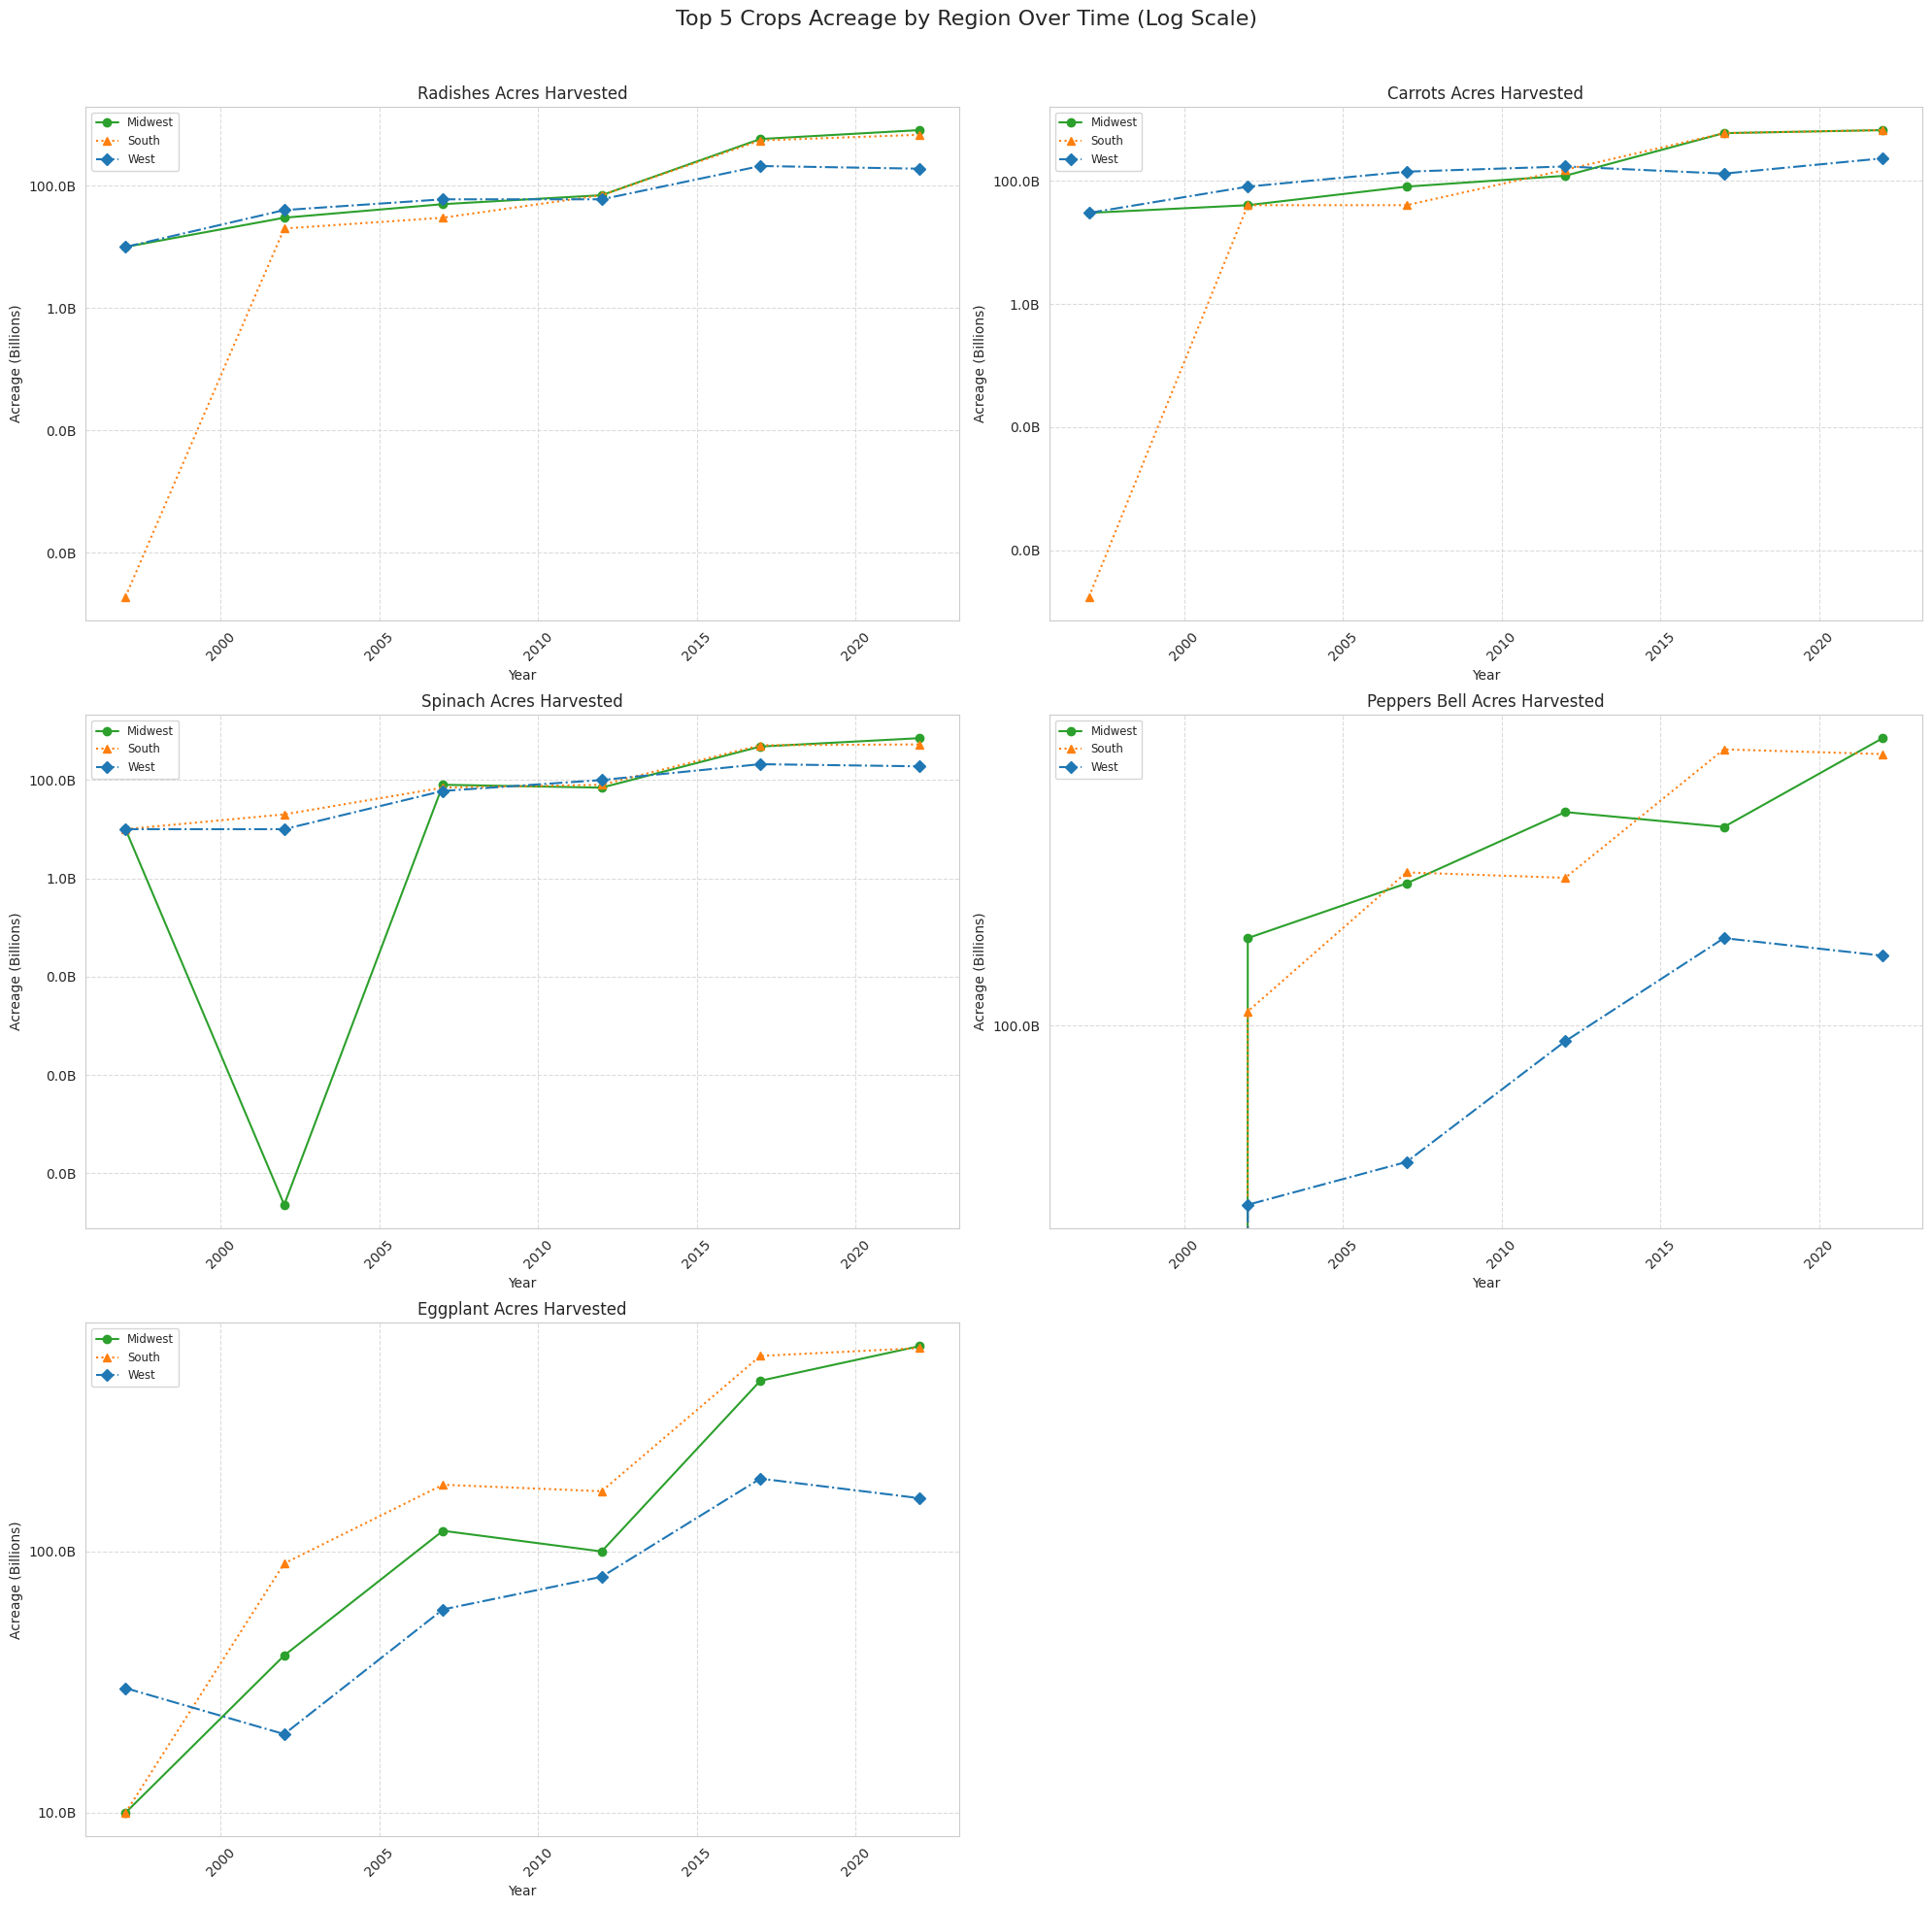

In [39]:
# Show that top 5 crops based on thier regional growth.

import seaborn as sns

# Assume prompt_wide_three is already loaded
df = prompt_wide_three

# Clean STATE_FIPS_CODE
df['STATE_FIPS_CODE'] = df['STATE_FIPS_CODE'].replace('(D)', np.nan)
df['STATE_FIPS_CODE'] = pd.to_numeric(df['STATE_FIPS_CODE'], errors='coerce')

# Filter out FIPS codes above 56
df['STATE_FIPS_CODE'] = df['STATE_FIPS_CODE'].where(df['STATE_FIPS_CODE'] <= 56, np.nan)

# Format FIPS codes
df['STATE_FIPS_CODE'] = df['STATE_FIPS_CODE'].fillna(0).astype(int).astype(str).str.zfill(2)

# Convert FIPS to state abbreviations
df['STATE_ABBR'] = df['STATE_FIPS_CODE'].map(fips_to_state)

# Replace '00' with NaN for both columns
df.loc[df['STATE_FIPS_CODE'] == '00', ['STATE_FIPS_CODE', 'STATE_ABBR']] = np.nan

# Get the top 5 crops based on the most recent year
top_5_crops # is top  5 crops


def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Other'

df['REGION'] = df['STATE_ABBR'].apply(get_region)

regional_data = df.groupby(['REGION', 'YEAR'])[top_5_crops].sum().reset_index()

fig, axes = plt.subplots(3, 2, figsize=(20, 20))  # Increased figure size for better readability
fig.suptitle('Top 5 Crops Acreage by Region Over Time (Log Scale)', fontsize=16)

colors = {'West': '#1f77b4', 'South': '#ff7f0e', 'Midwest': '#2ca02c', 'Other': '#d62728'}
line_styles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'D']

for i, crop in enumerate(top_5_crops):
    ax = axes[i // 2, i % 2]

    for j, region in enumerate(regional_data['REGION'].unique()):
        if region != 'Other':
            data = regional_data[regional_data['REGION'] == region]
            y_values = data[crop] / 1e9  # Convert to billions
            line = ax.semilogy(data['YEAR'], y_values,
                    label=region,
                    color=colors[region],
                    linestyle=line_styles[j],
                    marker=markers[j],
                    markersize=6)


    ax.set_title(crop.replace('_', ' ').title())
    ax.set_xlabel('Year')
    ax.set_ylabel('Acreage (Billions)')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(loc='upper left', fontsize='small')
    ax.tick_params(axis='x', rotation=45)

    # Format y-axis ticks to show billions
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}B'))

# Remove the empty subplot (if any)
if len(top_5_crops) < 6:
    fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Adjust for the main title
plt.show()

##print(regional_data)






<ipython-input-84-ca01daf83d61>:4: DtypeWarning:

Columns (5,6,7,8,9,10,13,14,15,16,30,31,46,47,52,53,54,55,56,57,58,59,60,61,64,65,66,67,70,71,72,73,74,75,78,79,80,81,82,83,84,85,86,87,88,89,92,93,94,95) have mixed types. Specify dtype option on import or set low_memory=False.




List of top 5 crop column names:
['GRAIN_SALES_MEASURED_IN_DOLLARS', 'CORN_SALES_MEASURED_IN_DOLLARS', 'SOYBEANS_SALES_MEASURED_IN_DOLLARS', 'FRUIT_TREE_NUT_TOTALS_SALES_MEASURED_IN_DOLLARS', 'VEGETABLE_TOTALS_INCL_SEEDS_TRANSPLANTS_IN_THE_OPEN_SALES_MEASURED_IN_DOLLARS']


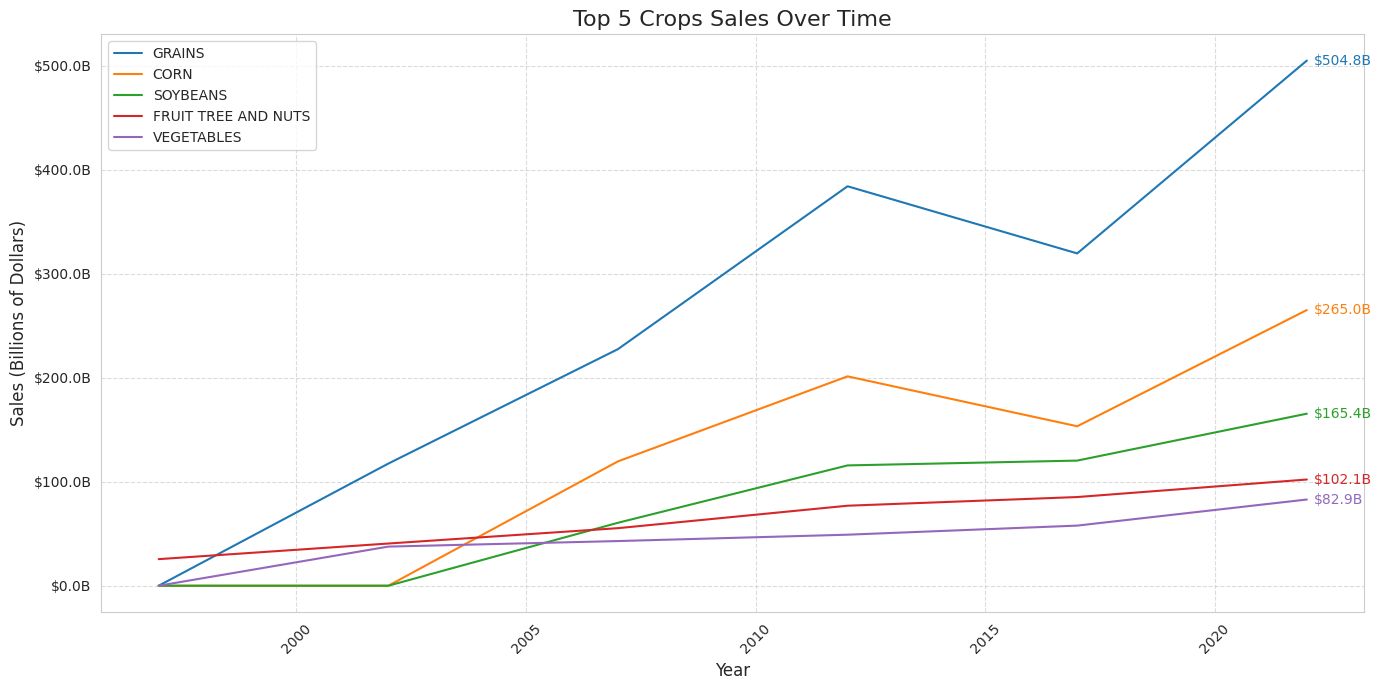

Top 5 Crops by Total Sales:
GRAINS
CORN
SOYBEANS
FRUIT TREE AND NUTS
VEGETABLES


In [84]:
# for the top 5 sale.

file_path = '/content/drive/MyDrive/Colab Notebooks/sales_data_county.csv'
sales_data_county = pd.read_csv(file_path)


# Assume prompt_wide_three is already loaded
df = sales_data_county

sale_crops_list = [
    'BARLEY_SALES_MEASURED_IN_DOLLARS',
    'BERRY_TOTALS_SALES_MEASURED_IN_DOLLARS',
    'CORN_SALES_MEASURED_IN_DOLLARS',
    'COTTON_LINT_SEED_SALES_MEASURED_IN_DOLLARS',
    'FIELD_CROPS_OTHER_INCL_HAY_SALES_MEASURED_IN_DOLLARS',
    'FRUIT_TREE_NUT_TOTALS_EXCL_BERRIES_SALES_MEASURED_IN_DOLLARS',
    'FRUIT_TREE_NUT_TOTALS_SALES_MEASURED_IN_DOLLARS',
    'GRAIN_OTHER_SALES_MEASURED_IN_DOLLARS',
    'GRAIN_SALES_MEASURED_IN_DOLLARS',
    'HORTICULTURE_TOTALS_EXCL_CUT_TREES_VEGETABLE_SEEDS_TRANSPLANTS_SALES_MEASURED_IN_DOLLARS',
    'RICE_SALES_MEASURED_IN_DOLLARS',
    'SHORT_TERM_WOODY_CROPS_SALES_MEASURED_IN_DOLLARS',
    'SORGHUM_SALES_MEASURED_IN_DOLLARS',
    'SOYBEANS_SALES_MEASURED_IN_DOLLARS',
    'TOBACCO_SALES_MEASURED_IN_DOLLARS',
    'VEGETABLE_TOTALS_INCL_SEEDS_TRANSPLANTS_IN_THE_OPEN_SALES_MEASURED_IN_DOLLARS',
    'WHEAT_SALES_MEASURED_IN_DOLLARS'
]


# Clean STATE_FIPS_CODE
df['STATE_FIPS_CODE'] = df['STATE_FIPS_CODE'].replace('(D)', np.nan)
df['STATE_FIPS_CODE'] = pd.to_numeric(df['STATE_FIPS_CODE'], errors='coerce')

# Filter out FIPS codes above 56
df['STATE_FIPS_CODE'] = df['STATE_FIPS_CODE'].where(df['STATE_FIPS_CODE'] <= 56, np.nan)

# Format FIPS codes
df['STATE_FIPS_CODE'] = df['STATE_FIPS_CODE'].fillna(0).astype(int).astype(str).str.zfill(2)

# Convert FIPS to state abbreviations
df['STATE_ABBR'] = df['STATE_FIPS_CODE'].map(fips_to_state)

# Replace '00' with NaN for both columns
df.loc[df['STATE_FIPS_CODE'] == '00', ['STATE_FIPS_CODE', 'STATE_ABBR']] = np.nan




def clean_sales_column(df, column_name):
   # print(f"\nCleaning column: {column_name}")

    # Make a copy of the column to avoid SettingWithCopyWarning
    temp_column = df[column_name].copy()

    # Print initial value counts
   # print("Initial value counts:")
    #print(temp_column.value_counts(dropna=False).head())

    # Check for and replace '(D)' with NaN
    d_count = (temp_column == '(D)').sum()
    temp_column = temp_column.replace('(D)', np.nan)
    #print(f"Replaced {d_count} '(D)' values with NaN")

    # Remove commas and dollar signs if present
    temp_column = temp_column.replace('[\$,]', '', regex=True)

    # Attempt to convert to float, print any errors
    try:
        temp_column = pd.to_numeric(temp_column, errors='raise')
    except ValueError as e:
        #print(f"Error in conversion: {e}")
        #print("Problematic values:")
        #print(temp_column[pd.to_numeric(temp_column, errors='coerce').isna()].value_counts().head())

        # Convert to float, coercing errors to NaN
        temp_column = pd.to_numeric(temp_column, errors='coerce')

    # Assign the cleaned column back to the dataframe
    df[column_name] = temp_column

    # # Print summary statistics to check the result
    # print(f"Dtype: {df[column_name].dtype}")
    # print(f"Number of NaN values: {df[column_name].isna().sum()}")
    # print(f"Min value: {df[column_name].min()}")
    # print(f"Max value: {df[column_name].max()}")
    # print(f"Mean value: {df[column_name].mean()}")

    # # Print final value counts
    # print("Final value counts:")
    # print(df[column_name].value_counts(dropna=False).head())

# Clean 'BARLEY_SALES_MEASURED_IN_DOLLARS' first
clean_sales_column(df, 'BARLEY_SALES_MEASURED_IN_DOLLARS')

# Now clean all columns in sale_crops_list
for column in sale_crops_list:
    clean_sales_column(df, column)

# Final check: print dtypes of all cleaned columns
# print("\nFinal dtype check:")
# for column in sale_crops_list:
#     print(f"{column}: {df[column].dtype}")

# Create an empty list to store the top 5 crops
top_5_crop_sales = []

def get_top_5_crops(df, sale_crops_list):
    # Calculate total sales for each crop across all years
    total_sales = df[sale_crops_list].sum().sort_values(ascending=False)
    # Get the top 5 crops
    top_5 = total_sales.head(5).index.tolist()
    return top_5

def plot_top_5_crops_sales(df, top_5_crops):
    # Define a dictionary to map column names to more readable labels
    label_map = {
        'FRUIT_TREE_NUT_TOTALS_SALES_MEASURED_IN_DOLLARS': 'FRUIT TREE AND NUTS',
        'GRAIN_SALES_MEASURED_IN_DOLLARS': 'GRAINS',
        'VEGETABLE_TOTALS_INCL_SEEDS_TRANSPLANTS_IN_THE_OPEN_SALES_MEASURED_IN_DOLLARS': 'VEGETABLES',
        'CORN_SALES_MEASURED_IN_DOLLARS': 'CORN',
        'SOYBEANS_SALES_MEASURED_IN_DOLLARS': 'SOYBEANS',
        'COTTON_LINT_SEED_SALES_MEASURED_IN_DOLLARS': 'COTTON',
        'WHEAT_SALES_MEASURED_IN_DOLLARS': 'WHEAT',
        'BERRY_TOTALS_SALES_MEASURED_IN_DOLLARS': 'BERRIES',
        'RICE_SALES_MEASURED_IN_DOLLARS': 'RICE',
        'TOBACCO_SALES_MEASURED_IN_DOLLARS': 'TOBACCO',
        'HORTICULTURE_TOTALS_EXCL_CUT_TREES_VEGETABLE_SEEDS_TRANSPLANTS_SALES_MEASURED_IN_DOLLARS': 'HORTICULTURE',
        'FIELD_CROPS_OTHER_INCL_HAY_SALES_MEASURED_IN_DOLLARS': 'OTHER FIELD CROPS',
        'SORGHUM_SALES_MEASURED_IN_DOLLARS': 'SORGHUM',
        'BARLEY_SALES_MEASURED_IN_DOLLARS': 'BARLEY',
        'SHORT_TERM_WOODY_CROPS_SALES_MEASURED_IN_DOLLARS': 'SHORT TERM WOODY CROPS',
        'GRAIN_OTHER_SALES_MEASURED_IN_DOLLARS': 'OTHER GRAINS'
    }

    # Prepare data for plotting
    plot_data = df[['YEAR'] + top_5_crops].groupby('YEAR').sum()

    # Create the plot
    plt.figure(figsize=(14, 7))

    for crop in top_5_crops:
        # Convert to billions for y-axis
        y_values = plot_data[crop] / 1e9
        line, = plt.plot(plot_data.index, y_values, label=label_map.get(crop, crop))

        # Add value label at the end of each line
        last_year = plot_data.index[-1]
        last_value = y_values.iloc[-1]
        plt.annotate(f'${last_value:.1f}B',
                     xy=(last_year, last_value),
                     xytext=(5, 0),
                     textcoords='offset points',
                     va='center',
                     color=line.get_color())

    plt.title('Top 5 Crops Sales Over Time', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Sales (Billions of Dollars)', fontsize=12)
    plt.legend(fontsize=10, loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Format y-axis ticks to show billions
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:.1f}B'))

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    # Print out the top 5 crops for reference
    print("Top 5 Crops by Total Sales:")
    for crop in top_5_crops:
        print(f"{label_map.get(crop, crop)}")

# Get the top 5 crops
top_5_crop_sales = get_top_5_crops(df, sale_crops_list)

# Print the list of top 5 crop column names
# print("\nList of top 5 crop column names:")
# print(top_5_crop_sales)

# Call the function to create the plot
plot_top_5_crops_sales(df, top_5_crop_sales)



Top 5 Crops by Total Sales in West:
Fruit Tree Nut Totals
Fruit Tree Nut Totals Excl Berries
Vegetable Totals Incl Seeds Transplants In The Open
Grain
Field Crops Other Incl Hay

Top 5 Crops by Total Sales in South:
Grain
Horticulture Totals Excl Cut Trees Vegetable Seeds Transplants
Cotton Lint Seed
Soybeans
Corn

Top 5 Crops by Total Sales in Midwest:
Grain
Corn
Soybeans
Wheat
Field Crops Other Incl Hay


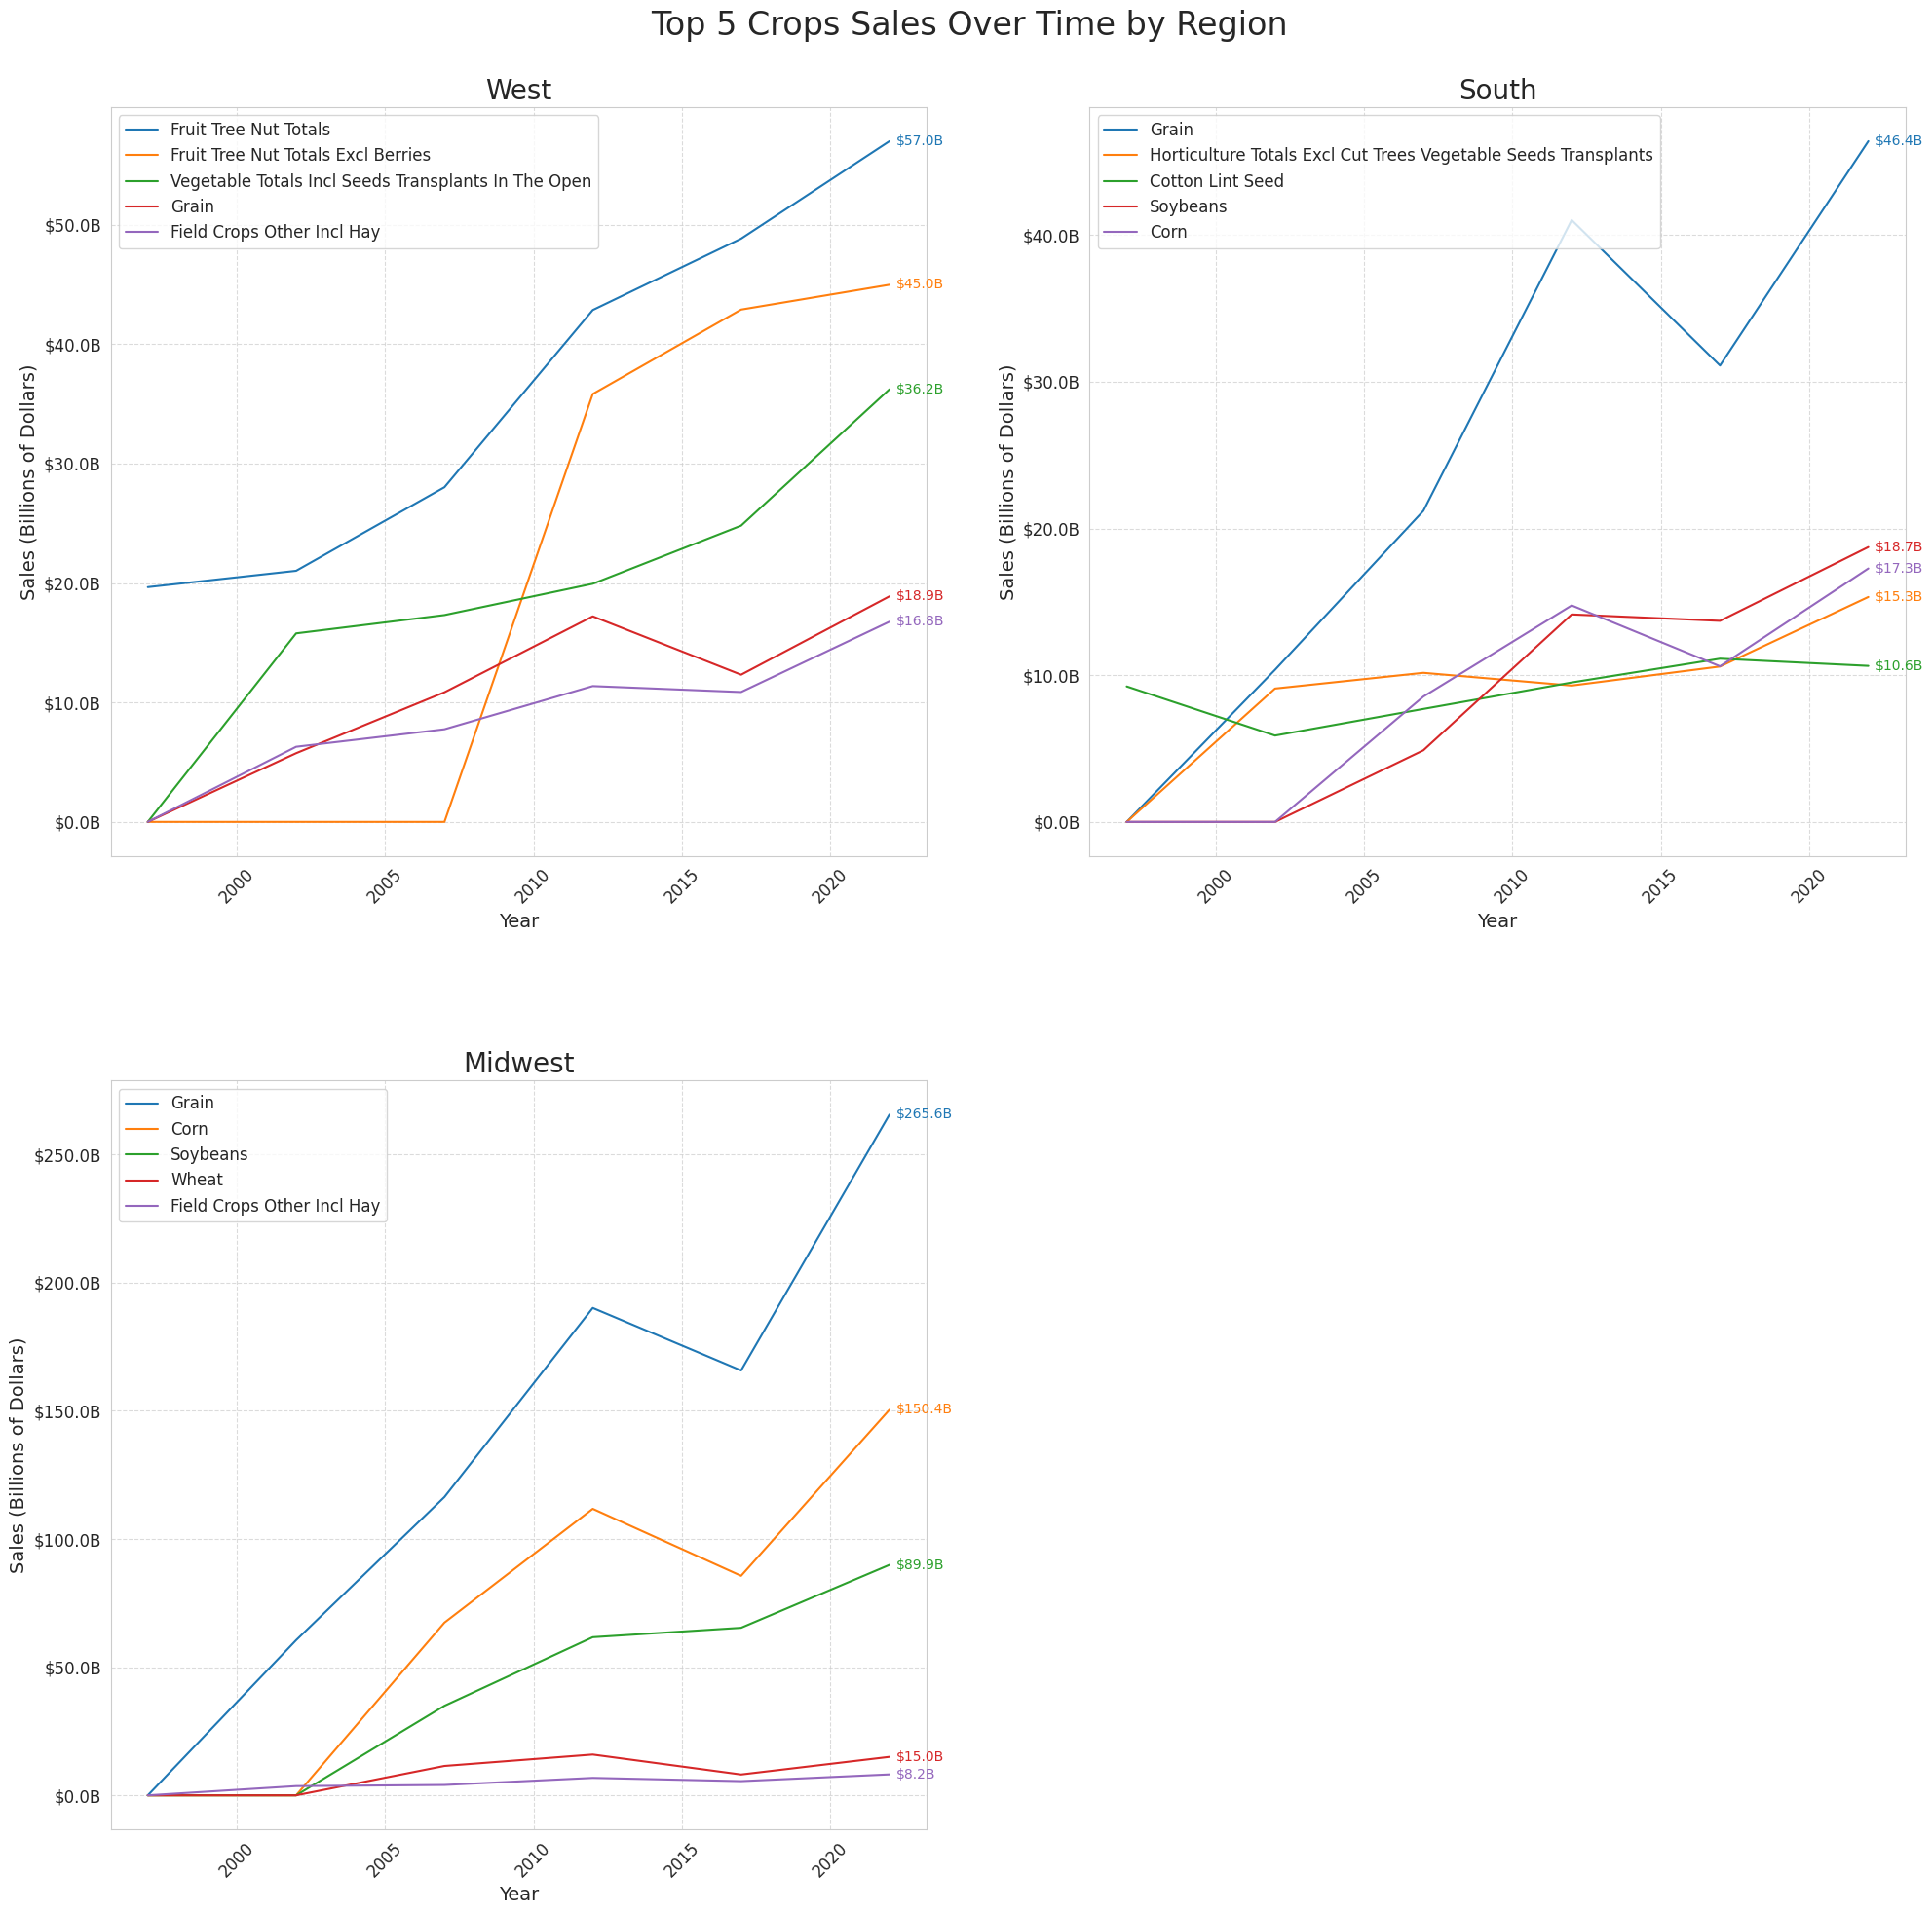

In [88]:
#NOw top 5 with regiona


# Assume prompt_wide_three is already loaded
df = sales_data_county

sale_crops_list = [
    'BARLEY_SALES_MEASURED_IN_DOLLARS',
    'BERRY_TOTALS_SALES_MEASURED_IN_DOLLARS',
    'CORN_SALES_MEASURED_IN_DOLLARS',
    'COTTON_LINT_SEED_SALES_MEASURED_IN_DOLLARS',
    'FIELD_CROPS_OTHER_INCL_HAY_SALES_MEASURED_IN_DOLLARS',
    'FRUIT_TREE_NUT_TOTALS_EXCL_BERRIES_SALES_MEASURED_IN_DOLLARS',
    'FRUIT_TREE_NUT_TOTALS_SALES_MEASURED_IN_DOLLARS',
    'GRAIN_OTHER_SALES_MEASURED_IN_DOLLARS',
    'GRAIN_SALES_MEASURED_IN_DOLLARS',
    'HORTICULTURE_TOTALS_EXCL_CUT_TREES_VEGETABLE_SEEDS_TRANSPLANTS_SALES_MEASURED_IN_DOLLARS',
    'RICE_SALES_MEASURED_IN_DOLLARS',
    'SHORT_TERM_WOODY_CROPS_SALES_MEASURED_IN_DOLLARS',
    'SORGHUM_SALES_MEASURED_IN_DOLLARS',
    'SOYBEANS_SALES_MEASURED_IN_DOLLARS',
    'TOBACCO_SALES_MEASURED_IN_DOLLARS',
    'VEGETABLE_TOTALS_INCL_SEEDS_TRANSPLANTS_IN_THE_OPEN_SALES_MEASURED_IN_DOLLARS',
    'WHEAT_SALES_MEASURED_IN_DOLLARS'
]


# Clean STATE_FIPS_CODE
df['STATE_FIPS_CODE'] = df['STATE_FIPS_CODE'].replace('(D)', np.nan)
df['STATE_FIPS_CODE'] = pd.to_numeric(df['STATE_FIPS_CODE'], errors='coerce')

# Filter out FIPS codes above 56
df['STATE_FIPS_CODE'] = df['STATE_FIPS_CODE'].where(df['STATE_FIPS_CODE'] <= 56, np.nan)

# Format FIPS codes
df['STATE_FIPS_CODE'] = df['STATE_FIPS_CODE'].fillna(0).astype(int).astype(str).str.zfill(2)

# Convert FIPS to state abbreviations
df['STATE_ABBR'] = df['STATE_FIPS_CODE'].map(fips_to_state)

# Replace '00' with NaN for both columns
df.loc[df['STATE_FIPS_CODE'] == '00', ['STATE_FIPS_CODE', 'STATE_ABBR']] = np.nan




def clean_sales_column(df, column_name):
   # print(f"\nCleaning column: {column_name}")

    # Make a copy of the column to avoid SettingWithCopyWarning
    temp_column = df[column_name].copy()



    # Check for and replace '(D)' with NaN
    d_count = (temp_column == '(D)').sum()
    temp_column = temp_column.replace('(D)', np.nan)
    #print(f"Replaced {d_count} '(D)' values with NaN")

    # Remove commas and dollar signs if present
    temp_column = temp_column.replace('[\$,]', '', regex=True)

    # Attempt to convert to float, print any errors
    try:
        temp_column = pd.to_numeric(temp_column, errors='raise')
    except ValueError as e:
        #print(f"Error in conversion: {e}")
        #print("Problematic values:")
        #print(temp_column[pd.to_numeric(temp_column, errors='coerce').isna()].value_counts().head())

        # Convert to float, coercing errors to NaN
        temp_column = pd.to_numeric(temp_column, errors='coerce')

    # Assign the cleaned column back to the dataframe
    df[column_name] = temp_column


# Clean 'BARLEY_SALES_MEASURED_IN_DOLLARS' first
clean_sales_column(df, 'BARLEY_SALES_MEASURED_IN_DOLLARS')

# Now clean all columns in sale_crops_list
for column in sale_crops_list:
    clean_sales_column(df, column)




#List of top 5 crops:
top_5_crop_sales

def get_top_5_crops_by_region(df, sale_crops_list, region_states):
    df_region = df[df['STATE_ABBR'].isin(region_states)]
    total_sales = df_region[sale_crops_list].sum().sort_values(ascending=False)
    return total_sales.head(5).index.tolist()

def plot_all_regions_top_5_crops(df, sale_crops_list, regions):
    fig, axes = plt.subplots(2, 2, figsize=(20, 20))
    fig.suptitle('Top 5 Crops Sales Over Time by Region', fontsize=24)

    for i, (region, states) in enumerate(regions.items()):
        top_5_crops = get_top_5_crops_by_region(df, sale_crops_list, states)
        df_region = df[df['STATE_ABBR'].isin(states)]
        plot_data = df_region[['YEAR'] + top_5_crops].groupby('YEAR').sum()

        # Determine the subplot position
        if i < 2:
            ax = axes[0, i]
        else:
            ax = axes[1, 0]

        for crop in top_5_crops:
            y_values = plot_data[crop] / 1e9
            crop_name = crop.replace('_SALES_MEASURED_IN_DOLLARS', '').replace('_', ' ').title()
            line, = ax.plot(plot_data.index, y_values, label=crop_name)

            last_year = plot_data.index[-1]
            last_value = y_values.iloc[-1]
            ax.annotate(f'${last_value:.1f}B',
                        xy=(last_year, last_value),
                        xytext=(5, 0),
                        textcoords='offset points',
                        va='center',
                        color=line.get_color())

        ax.set_title(f'{region}', fontsize=20)
        ax.set_xlabel('Year', fontsize=14)
        ax.set_ylabel('Sales (Billions of Dollars)', fontsize=14)
        ax.legend(fontsize=12, loc='upper left')
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:.1f}B'))
        ax.tick_params(axis='x', rotation=45)
        ax.tick_params(axis='both', which='major', labelsize=12)

        print(f"\nTop 5 Crops by Total Sales in {region}:")
        for crop in top_5_crops:
            crop_name = crop.replace('_SALES_MEASURED_IN_DOLLARS', '').replace('_', ' ').title()
            print(crop_name)

    # Remove the empty subplot
    fig.delaxes(axes[1, 1])

    plt.tight_layout()
    plt.subplots_adjust(top=0.93, hspace=0.3, wspace=0.2)  # Adjust spacing
    plt.show()

# Call the function to create the combined plot
plot_all_regions_top_5_crops(df, sale_crops_list, regions)


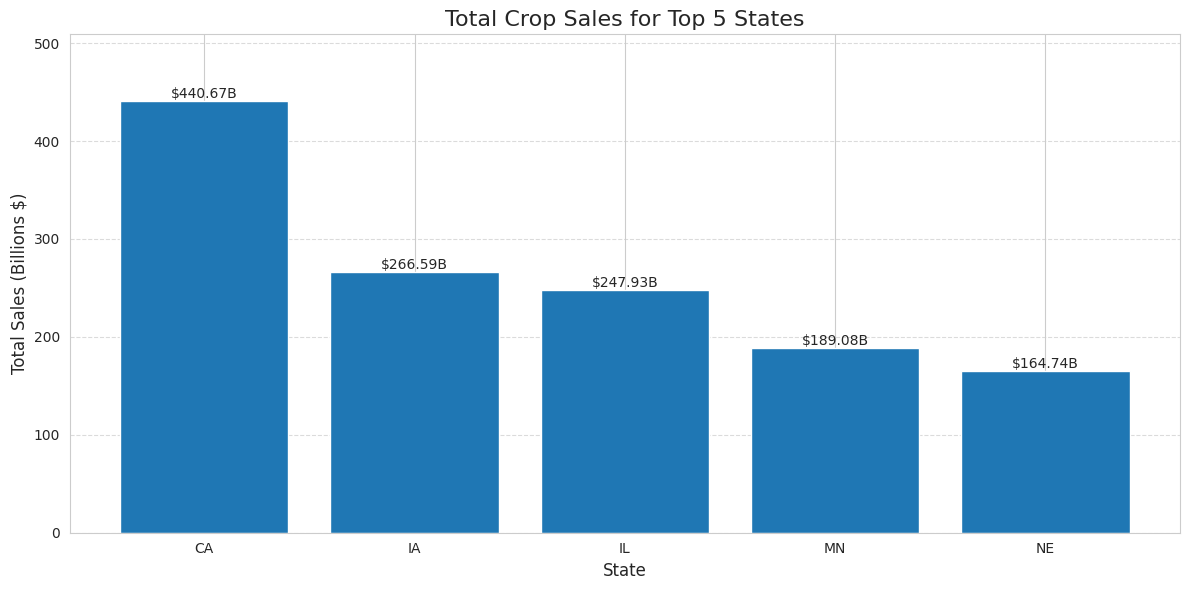

In [103]:
#Sale by State.

df = sales_data_county

sale_crops_list = [
    'BARLEY_SALES_MEASURED_IN_DOLLARS',
    'BERRY_TOTALS_SALES_MEASURED_IN_DOLLARS',
    'CORN_SALES_MEASURED_IN_DOLLARS',
    'COTTON_LINT_SEED_SALES_MEASURED_IN_DOLLARS',
    'FIELD_CROPS_OTHER_INCL_HAY_SALES_MEASURED_IN_DOLLARS',
    'FRUIT_TREE_NUT_TOTALS_EXCL_BERRIES_SALES_MEASURED_IN_DOLLARS',
    'FRUIT_TREE_NUT_TOTALS_SALES_MEASURED_IN_DOLLARS',
    'GRAIN_OTHER_SALES_MEASURED_IN_DOLLARS',
    'GRAIN_SALES_MEASURED_IN_DOLLARS',
    'HORTICULTURE_TOTALS_EXCL_CUT_TREES_VEGETABLE_SEEDS_TRANSPLANTS_SALES_MEASURED_IN_DOLLARS',
    'RICE_SALES_MEASURED_IN_DOLLARS',
    'SHORT_TERM_WOODY_CROPS_SALES_MEASURED_IN_DOLLARS',
    'SORGHUM_SALES_MEASURED_IN_DOLLARS',
    'SOYBEANS_SALES_MEASURED_IN_DOLLARS',
    'TOBACCO_SALES_MEASURED_IN_DOLLARS',
    'VEGETABLE_TOTALS_INCL_SEEDS_TRANSPLANTS_IN_THE_OPEN_SALES_MEASURED_IN_DOLLARS',
    'WHEAT_SALES_MEASURED_IN_DOLLARS'
]


# Clean STATE_FIPS_CODE
df['STATE_FIPS_CODE'] = df['STATE_FIPS_CODE'].replace('(D)', np.nan)
df['STATE_FIPS_CODE'] = pd.to_numeric(df['STATE_FIPS_CODE'], errors='coerce')

# Filter out FIPS codes above 56
df['STATE_FIPS_CODE'] = df['STATE_FIPS_CODE'].where(df['STATE_FIPS_CODE'] <= 56, np.nan)

# Format FIPS codes
df['STATE_FIPS_CODE'] = df['STATE_FIPS_CODE'].fillna(0).astype(int).astype(str).str.zfill(2)

# Convert FIPS to state abbreviations
df['STATE_ABBR'] = df['STATE_FIPS_CODE'].map(fips_to_state)

# Replace '00' with NaN for both columns
df.loc[df['STATE_FIPS_CODE'] == '00', ['STATE_FIPS_CODE', 'STATE_ABBR']] = np.nan






def clean_sales_column(df, column_name):
   # print(f"\nCleaning column: {column_name}")

    # Make a copy of the column to avoid SettingWithCopyWarning
    temp_column = df[column_name].copy()



    # Check for and replace '(D)' with NaN
    d_count = (temp_column == '(D)').sum()
    temp_column = temp_column.replace('(D)', np.nan)
    #print(f"Replaced {d_count} '(D)' values with NaN")

    # Remove commas and dollar signs if present
    temp_column = temp_column.replace('[\$,]', '', regex=True)

    # Attempt to convert to float, print any errors
    try:
        temp_column = pd.to_numeric(temp_column, errors='raise')
    except ValueError as e:
        #print(f"Error in conversion: {e}")
        #print("Problematic values:")
        #print(temp_column[pd.to_numeric(temp_column, errors='coerce').isna()].value_counts().head())

        # Convert to float, coercing errors to NaN
        temp_column = pd.to_numeric(temp_column, errors='coerce')

    # Assign the cleaned column back to the dataframe
    df[column_name] = temp_column


# Clean 'BARLEY_SALES_MEASURED_IN_DOLLARS' first
##clean_sales_column(df, 'BARLEY_SALES_MEASURED_IN_DOLLARS')

# Now clean all columns in sale_crops_list
for column in sale_crops_list:
    clean_sales_column(df, column)



def get_top_5_crops_by_region(df, sale_crops_list, region_states):
    df_region = df[df['STATE_ABBR'].isin(region_states)]
    total_sales = df_region[sale_crops_list].sum().sort_values(ascending=False)
    return total_sales.head(5).index.tolist()



# Sum up all crop sales for each state
state_total_sales = df.groupby('STATE_ABBR')[sale_crops_list].sum().sum(axis=1)

# Convert to billions
state_total_sales_billions = state_total_sales / 1e9

# Sort the states by total sales and get the top 5
top_5_states = state_total_sales_billions.sort_values(ascending=False).head(5)

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_5_states.index, top_5_states.values)

# Customize the plot
plt.title('Total Crop Sales for Top 5 States', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales (Billions $)', fontsize=12)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.2f}B',
             ha='center', va='bottom', rotation=0)

# Adjust y-axis to start from 0
plt.ylim(0, plt.ylim()[1] * 1.1)  # Add 10% padding at the top

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()






<ipython-input-89-521ca052a3f2>:2: DtypeWarning:

Columns (5,6,7,8,9,10,13,14,15,16,30,31,46,47,52,53,54,55,56,57,58,59,60,61,64,65,66,67,70,71,72,73,74,75,78,79,80,81,82,83,84,85,86,87,88,89,92,93,94,95) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-89-521ca052a3f2>:61: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



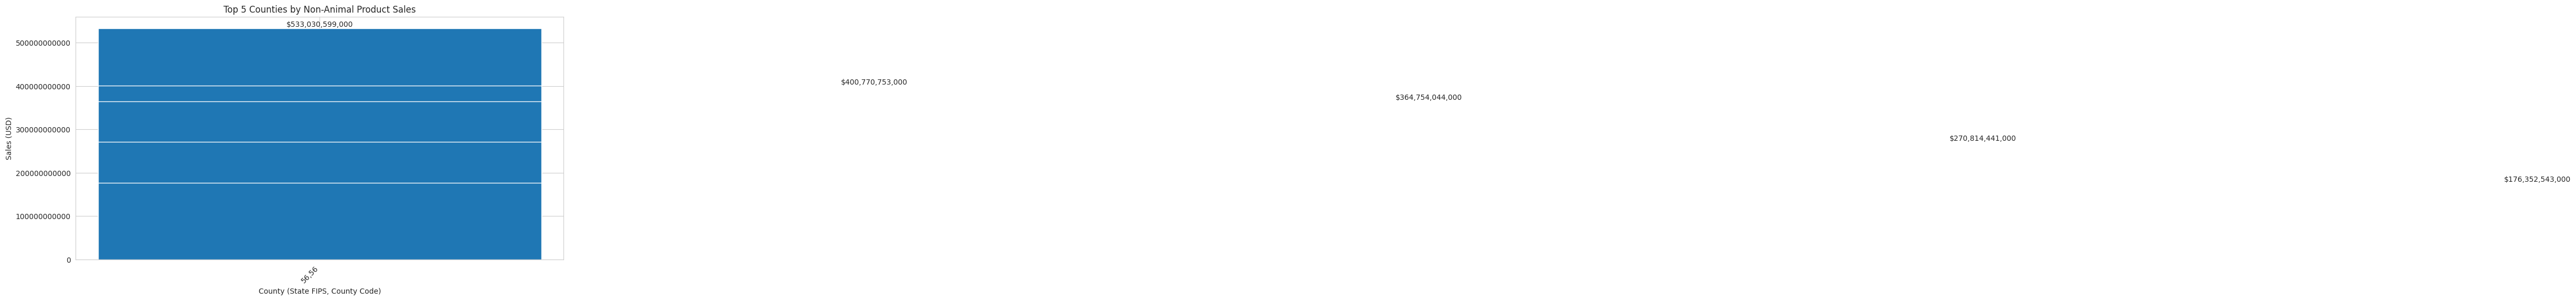

Top 5 Counties by Non-Animal Product Sales:
State FIPS: 56, County Code: 56, Sales: $533,030,599,000
State FIPS: 56, County Code: 56, Sales: $400,770,753,000
State FIPS: 56, County Code: 56, Sales: $364,754,044,000
State FIPS: 56, County Code: 56, Sales: $270,814,441,000
State FIPS: 56, County Code: 56, Sales: $176,352,543,000


In [89]:
file_path = '/content/drive/MyDrive/Colab Notebooks/sales_data_county.csv'
sales_data_county = pd.read_csv(file_path)
sales_data_county.columns
import csv
import matplotlib.pyplot as plt


# Function to parse dollar amounts
def parse_dollar(value):
    return int(value.replace('$', '').replace(',', '')) if value not in ['(D)', '(Z)', 'NA'] else 0

# Function to clean FIPS codes
def clean_fips(fips, max_value):
    try:
        fips_int = int(fips)
        return str(min(fips_int, max_value))
    except ValueError:
        return '0'

# Read and process the CSV data
data = []
with open(file_path, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        state_fips = clean_fips(row['STATE_FIPS_CODE'], 56)
        county_code = clean_fips(row['COUNTY_CODE'], 56)  # Assuming max county code is 999
        if state_fips != '0' and county_code != '0':  # Skip rows with invalid codes
            non_animal_sales = sum([
                parse_dollar(row['CROP_TOTALS_SALES_MEASURED_IN_DOLLARS']),
                parse_dollar(row['GRAIN_SALES_MEASURED_IN_DOLLARS']),
                parse_dollar(row['VEGETABLE_TOTALS_INCL_SEEDS_TRANSPLANTS_IN_THE_OPEN_SALES_MEASURED_IN_DOLLARS']),
                parse_dollar(row['FRUIT_TREE_NUT_TOTALS_SALES_MEASURED_IN_DOLLARS']),
                parse_dollar(row['HORTICULTURE_TOTALS_EXCL_CUT_TREES_VEGETABLE_SEEDS_TRANSPLANTS_SALES_MEASURED_IN_DOLLARS'])
            ])
            data.append({
                'state_fips': state_fips,
                'county_code': county_code,
                'non_animal_sales': non_animal_sales
            })

# Sort data by non-animal sales and get top 5
top_5 = sorted(data, key=lambda x: x['non_animal_sales'], reverse=True)[:5]

# Prepare data for plotting
counties = [f"{item['state_fips']},{item['county_code']}" for item in top_5]
sales = [item['non_animal_sales'] for item in top_5]

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(counties, sales)
plt.title('Top 5 Counties by Non-Animal Product Sales')
plt.xlabel('County (State FIPS, County Code)')
plt.ylabel('Sales (USD)')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(sales):
    plt.text(i, v, f'${v:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the results
print("Top 5 Counties by Non-Animal Product Sales:")
for item in top_5:
    print(f"State FIPS: {item['state_fips']}, County Code: {item['county_code']}, Sales: ${item['non_animal_sales']:,}")